## Exploratory Data Analysis

### Author: Rajiv Swamy
### Course: SML 312

## AirBnB Data Analysis: Austin, TX

In [3]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


## Cleaning and Processing: Same process as Cleaning_EDA_Austin.ipynb

The following EDA is initially conducted on the September 2022 Austin scrape from InsideAirbnb

In [1]:
folder_choice = './airbnb_data/austin/03-2022/'

In [2]:
# Data source paths
listings_path = './airbnb_data/austin/03-2022/listings.csv'
calendar_path = './airbnb_data/austin/03-2022/calendar.csv'

raw_list_df = pd.read_csv(listings_path)
raw_cal_df = pd.read_csv(calendar_path)

pd.set_option('display.max_columns', 150) # To view all columns
pd.set_option('display.max_rows', 150)

raw_list_df.set_index('id', inplace=True)


# Future listings path
future_listings_path = './airbnb_data/austin/06-2022/listings.csv'

# extract number of reviews from future listing
raw_future_list = pd.read_csv(future_listings_path)
right = raw_future_list.set_index('id')['number_of_reviews']

merged = raw_list_df.join(right, how='inner',rsuffix='_future')


NameError: name 'pd' is not defined

In [27]:
raw_list_df.shape

(11972, 73)

The March 2022 dataset contains 11972 listings and 74 columns

In [28]:
raw_list_df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

In [29]:
raw_list_df.head()

listing_url       scrape_id last_scraped  \
id                                                                     
5456  https://www.airbnb.com/rooms/5456  20220312074014   2022-03-13   
5769  https://www.airbnb.com/rooms/5769  20220312074014   2022-03-31   
6413  https://www.airbnb.com/rooms/6413  20220312074014   2022-03-31   
6448  https://www.airbnb.com/rooms/6448  20220312074014   2022-03-12   
8502  https://www.airbnb.com/rooms/8502  20220312074014   2022-03-13   

                                                   name  \
id                                                        
5456          Walk to 6th, Rainey St and Convention Ctr   
5769                                     NW Austin Room   
6413                      Gem of a Studio near Downtown   
6448  Secluded Studio @ Zilker - King Bed, Bright & ...   
8502                            Woodland Studio Lodging   

                                            description  \
id                                                        
5456  Great central  location for walking to Convent...   
5769  <b>The space</b><br />Looking for a comfortabl...   
6413  Great studio apartment, perfect a single perso...   
6448  Clean, private space with everything you need ...   
8502  <b>The space</b><br />Fully furnished suite wi...   

                                  neighborhood_overview  \
id                                                        
5456  My neighborhood is ideally located if you want...   
5769  Quiet neighborhood with lots of trees and good...   
6413  Travis Heights is one of the oldest neighborho...   
6448  The neighborhood is fun and funky (but quiet)!...   
8502                                                NaN   

                                            picture_url  host_id  \
id                                                                 
5456  https://a0.muscache.com/pictures/14084884/b5a3...     8028   
5769  https://a0.muscache.com/pictures/23822033/ac94...     8186   
6413  https://a0.muscache.com/pictures/miso/Hosting-...    13879   
6448  https://a0.muscache.com/pictures/4513152/4ffc1...    14156   
8502  https://a0.muscache.com/pictures/miso/Hosting-...    25298   

                                     host_url  host_name  host_since  \
id                                                                     
5456   https://www.airbnb.com/users/show/8028     Sylvia  2009-02-16   
5769   https://www.airbnb.com/users/show/8186  Elizabeth  2009-02-19   
6413  https://www.airbnb.com/users/show/13879       Todd  2009-04-17   
6448  https://www.airbnb.com/users/show/14156        Amy  2009-04-20   
8502  https://www.airbnb.com/users/show/25298      Karen  2009-07-11   

                     host_location  \
id                                   
5456  Austin, Texas, United States   
5769  Austin, Texas, United States   
6413  Austin, Texas, United States   
6448  Austin, Texas, United States   
8502  Austin, Texas, United States   

                                             host_about host_response_time  \
id                                                                           
5456  I am a licensed Real Estate Broker and owner o...     within an hour   
5769  We're easygoing professionals that enjoy meeti...                NaN   
6413  We're a young family that likes to travel, we ...     within an hour   
6448  We are a family of four (with teenagers, all o...     within an hour   
8502  I handle the reservations at the studio on the...       within a day   

     host_response_rate host_acceptance_rate host_is_superhost  \
id                                                               
5456               100%                  94%                 t   
5769                NaN                 100%                 t   
6413               100%                 100%                 t   
6448               100%                  98%                 t   
8502                83%                  29%                 f   

                      

In [30]:
raw_list_df.isna().sum()

listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
description                                       164
neighborhood_overview                            4913
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                           3
host_since                                          3
host_location                                      18
host_about                                       4679
host_response_time                               3449
host_response_rate                               3449
host_acceptance_rate                             2862
host_is_superhost                                   3
host_thumbnail_url                                  3
host_picture_url            

In [31]:
raw_cal_df.isna().sum()

listing_id          0
date                0
available           0
price             168
adjusted_price    168
minimum_nights      4
maximum_nights      4
dtype: int64

### Test textblob package on sample description input

In [32]:
from textblob import TextBlob

desc = raw_list_df['description'].values.tolist()
desc[4]

"<b>The space</b><br />Fully furnished suite with kitchen, bathroom, breakfast counter, sitting area with sofa, and queen-sized bed.  Private patio entrance opens out onto large yard.  Stay close to downtown, SoCo, and artsy East Austin. This quiet neighborhood just off of Woodland Avenue has beautiful old oak trees, so it stays pleasant and shady through the summer.  Nearby city bus routes, so it is easy and inexpensive to get around, even if you don't have a car.  (Avoid the hassles of parking, too!)  Or rent a bike instead of a car.  Within easy reach of the airport.<br /><br />Stays of 2 weeks or more are $50/night.  Please ask and we can send a special offer with the reduced pricing.  <br /><br />Higher rates may apply during holidays, special events, depending on length of your stay.<br /><br />Please note, although there is a wireless internet connection, there is not a tv in the studio.<br /><br />Austin Short Term Rental License #085368"

In [33]:
b = TextBlob(desc[4])
b.sentiment[0]

# for num in range(10):
#     b = TextBlob(desc[num])
#     print(b.sentiment)

0.29514652014652015

## Merged Data Processing

In [34]:
# Check number of listings that have no reviews from where the reviews per month is null
test = merged[merged['reviews_per_month'].isna()]
(test['number_of_reviews'] == 0).sum()

2261

Reviews_per_month is only null where there are 0 reviews

In [35]:
# Wherever there are no reviews
((merged['number_of_reviews'] == 0) & (merged['reviews_per_month'].isna())).sum()

2261

In [36]:
mask = ((merged['availability_365'] == 0) & (merged['number_of_reviews'] == 0))
mask.sum()

1029

Assumption: listings where there is 0 availability in the next year and currently have 0 reviews are 'inactive' listings

In [37]:
merged['delta_num_reviews'] = merged['number_of_reviews_future'] - merged['number_of_reviews'] 

# drop negative values, only keep non-negative deltas
merged = merged[merged['delta_num_reviews'] >= 0]

# Drop 'inactive' listings
mask = ((merged['availability_365'] == 0) & (merged['number_of_reviews'] == 0) & (merged['delta_num_reviews'] == 0))

merged.drop(merged[mask].index, inplace=True)

In [38]:
REVIEW_RATE = 0.7

merged['nights_booked_est'] = merged['minimum_nights'] * (merged['delta_num_reviews'] * 1/REVIEW_RATE)

In [103]:
merged.isna().sum()

listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
description                                      117
neighborhood_overview                           3394
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          2
host_since                                         2
host_location                                      9
host_about                                      3274
host_response_time                              2299
host_response_rate                              2299
host_acceptance_rate                            1857
host_is_superhost                                  2
host_thumbnail_url                                 2
host_picture_url                              

Initial model will focus on categorical and numerical features. Review data and textual descriptions will be utilized later with NLP sentiment analysis. Hence, extraneous metadata columns will be dropped.

Text columns of future interest:
- neighborhood overview
- description
- Review data (separate csv file)
- host about
- amenities

In [39]:
# Drop extraneous metadata/columns not currently of interest
drop_cols = ['listing_url','scrape_id','last_scraped','name', 'neighborhood_overview', 'picture_url','host_url','host_name','host_location','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','host_about']
list_df = merged.drop(drop_cols, axis = 1)

In [40]:
list_df.isna().sum()

description                                      117
host_id                                            0
host_since                                         2
host_response_time                              2299
host_response_rate                              2299
host_acceptance_rate                            1857
host_is_superhost                                  2
host_listings_count                                2
host_total_listings_count                          2
host_has_profile_pic                               2
host_identity_verified                             2
neighbourhood                                   3394
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    9457
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                  

Initial observations: 
- columns with missing data for all rows: neighbourhood_group_cleansed, bathrooms, calendar_updated, license; these columns are dropped
- 'neighborhood' missing data for ~ 5k rows

In [41]:
drop_cols = ['neighbourhood_group_cleansed','bathrooms','calendar_updated','license','neighbourhood']
list_df.drop(drop_cols,axis=1, inplace=True)



In [42]:
list_df.head()

description  host_id  host_since  \
id                                                                             
5456  Great central  location for walking to Convent...     8028  2009-02-16   
5769  <b>The space</b><br />Looking for a comfortabl...     8186  2009-02-19   
6413  Great studio apartment, perfect a single perso...    13879  2009-04-17   
6448  Clean, private space with everything you need ...    14156  2009-04-20   
8502  <b>The space</b><br />Fully furnished suite wi...    25298  2009-07-11   

     host_response_time host_response_rate host_acceptance_rate  \
id                                                                
5456     within an hour               100%                  94%   
5769                NaN                NaN                 100%   
6413     within an hour               100%                 100%   
6448     within an hour               100%                  98%   
8502       within a day                83%                  29%   

     host_is_superhost  host_listings_count  host_total_listings_count  \
id                                                                       
5456                 t                  1.0                        1.0   
5769                 t                  1.0                        1.0   
6413                 t                  1.0                        1.0   
6448                 t                  2.0                        2.0   
8502                 f                  1.0                        1.0   

     host_has_profile_pic host_identity_verified  neighbourhood_cleansed  \
id                                                                         
5456                    t                      t                   78702   
5769                    t                      t                   78729   
6413                    t                      t                   78704   
6448                    t                      t                   78704   
8502                    t                      f                   78741   

      latitude  longitude         property_type        room_type  \
id                                                                 
5456  30.26057  -97.73441     Entire guesthouse  Entire home/apt   
5769  30.45697  -97.78422  Private room in home     Private room   
6413  30.24885  -97.73587     Entire guesthouse  Entire home/apt   
6448  30.26034  -97.76487     Entire guesthouse  Entire home/apt   
8502  30.23466  -97.73682    Entire guest suite  Entire home/apt   

      accommodates bathrooms_text  bedrooms  beds  \
id                                                  
5456             3         1 bath       1.0   2.0   
5769             2  1 shared bath       1.0   1.0   
6413             2         1 bath       NaN   1.0   
6448             3         1 bath       1.0   2.0   
8502             2         1 bath       1.0   1.0   

                                              amenities    price  \
id                                                                 
5456  ["Patio or balcony", "Hair dryer", "Security c...  $240.00   
5769  ["Essentials", "Hair dryer", "Hot water", "Hea...   $42.00   
6413  ["Kitchen", "Microwave", "Stove", "Shampoo", "...  $109.00   
6448  ["Toaster", "Ceiling fan", "Outlet covers", "C...  $325.00   
8502  ["Essentials", "Kitchen", "Host greets you", "...   $44.00   

      minimum_nights  maximum_nights  minimum_minimum_nights  \
id                                                             
5456               2              90                     2.0   
5769               1              14                     1.0   
6413               3             365                     3.0   
6448               3             365                     3.0   
8502               3              90                     3.0   

      maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
id                                                                             
5456                     3

### Add sentiment to the `description` column

In [43]:
# first fill all nan/null values to empty string
list_df['description'].fillna('',inplace=True)

list_df['description_sentiment'] = list_df['description'].apply(lambda desc: TextBlob(desc).sentiment[0])

list_df.drop('description',axis=1,inplace=True)

### Price: convert currency string into float value

In [44]:
from re import sub
from decimal import Decimal

# Adapted from https://stackoverflow.com/questions/8421922/how-do-i-convert-a-currency-string-to-a-floating-point-number-in-python
list_df['price'] = list_df['price'].apply(lambda x: float(Decimal(sub(r'[^\d.]', '', x))))

Exploring difference between `host_listings_count`, `host_total_listings_count`, `calculated_host_listings_count`
From data dictionary:
- `host_listings_count`: The number of listings the host has (per Airbnb calculations)
- `host_total_listings_count`: same as above
- `calculated_host_listings_count`: The number of listings the host has in the current scrape, in the city/region geography.

In [45]:
list_df[['host_listings_count','host_total_listings_count','calculated_host_listings_count']]

host_listings_count  host_total_listings_count  \
id                                                                   
5456                                1.0                        1.0   
5769                                1.0                        1.0   
6413                                1.0                        1.0   
6448                                2.0                        2.0   
8502                                1.0                        1.0   
...                                 ...                        ...   
580462092672410996                679.0                      679.0   
580582279500909804                679.0                      679.0   
580584759307470623                679.0                      679.0   
580587559136645969                679.0                      679.0   
580590011933192873                679.0                      679.0   

                    calculated_host_listings_count  
id                                                  
5456                                             1  
5769                                             1  
6413                                             1  
6448                                             1  
8502                                             1  
...                                            ...  
580462092672410996                             194  
580582279500909804                             194  
580584759307470623                             194  
580587559136645969                             194  
580590011933192873                             194  

[9457 rows x 3 columns]

In [46]:
list_df[list_df['host_listings_count'].isna()]

host_id host_since host_response_time host_response_rate  \
id                                                                   
4356661  21791967        NaN                NaN                NaN   
8214182  21556779        NaN                NaN                NaN   

        host_acceptance_rate host_is_superhost  host_listings_count  \
id                                                                    
4356661                  NaN               NaN                  NaN   
8214182                  NaN               NaN                  NaN   

         host_total_listings_count host_has_profile_pic  \
id                                                        
4356661                        NaN                  NaN   
8214182                        NaN                  NaN   

        host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
id                                                                            
4356661                    NaN                   78704  30.25492  -97.74532   
8214182                    NaN                   78741  30.22839  -97.72529   

                       property_type        room_type  accommodates  \
id                                                                    
4356661           Entire rental unit  Entire home/apt             2   
8214182  Private room in rental unit     Private room             1   

        bathrooms_text  bedrooms  beds  \
id                                       
4356661         1 bath       1.0   1.0   
8214182         1 bath       1.0   1.0   

                                                 amenities  price  \
id                                                                  
4356661  ["Kitchen", "Smoke alarm", "Long term stays al...   75.0   
8214182  ["Essentials", "Heating", "Smoke alarm", "Kitc...   27.0   

         minimum_nights  maximum_nights  minimum_minimum_nights  \
id                                                                
4356661               1            1125                     1.0   
8214182               1               5                     1.0   

         maximum_minimum_nights  minimum_maximum_nights  \
id                                                        
4356661                     1.0                  1125.0   
8214182                     1.0                     5.0   

         maximum_maximum_nights  minimum_nights_avg_ntm  \
id                                                        
4356661                  1125.0                     1.0   
8214182                     5.0                     1.0   

         maximum_nights_avg_ntm has_availability  availability_30  \
id                                                                  
4356661                  1125.0                f                0   
8214182                     5.0                t                0   

         availability_60  availability_90  availability_365  \
id                                                            
4356661                0                0                 0   
8214182                0                0                 0   

        calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
id                                                                        
4356661            2022-03-31                  1                      0   
8214182            2022-03-31                  4                      0   

         number_of_reviews_l30d first_review last_review  \
id                                                         
4356661                       0   2015-08-13  2015-08-13   
8214182                       0   2015-09-07  2015-09-24   

         review_scores_rating  review_scores_accuracy  \
id                                                      
4356661                  0.00                     NaN   
8214182                  4.67                    4.67   

         review_scores_cleanliness  review_scores_checkin  \
id                                                    

In [47]:
(list_df['host_listings_count'] == list_df['host_total_listings_count']).sum()

9455

Hostlistingscount and hosttotallistingscount have the same data. These columns do differ with the calculated host listings count for ~7k listings in the dataset

In [48]:
list_df[list_df['host_listings_count'] != list_df['calculated_host_listings_count']].shape

(5644, 57)

In [49]:
# drop the 'host_listings_count' column
list_df.drop('host_listings_count', axis=1, inplace=True)

Seems that `calculated_host_listings_count` has clean data for all rows and also focuses on the listings for hosts in the Austin area.

In [50]:
# Get number of unique zip codes in the cleansed neighbourhood column
list_df['neighbourhood_cleansed'].value_counts()

78704    1537
78702    1274
78701     699
78741     593
78745     445
78703     417
78751     374
78705     357
78723     307
78758     283
78734     261
78721     229
78744     198
78746     175
78757     172
78722     158
78748     148
78752     147
78737     144
78756     122
78731     120
78754     114
78729     110
78759     106
78753      97
78727      89
78749      88
78728      88
78724      85
78733      69
78732      62
78736      57
78747      54
78738      45
78717      44
78750      41
78725      40
78730      30
78735      28
78739      21
78742      11
78726       9
78719       9
Name: neighbourhood_cleansed, dtype: int64

Columns dealing with listing location include:
- neighbourhood_cleansed, lat, lon

`neighbourhood_cleansed` seems to be 5 digit zip codes encoded as ints, no missing data for this column, there seems to be 80 unique zip codes 

Hence, latitude and longitude will be used for initial


In [51]:
# Drop neighbourhood cleansed column for now
# list_df.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
# replace true false values to be 0/1 encoded
list_df.replace({'f': 0, 't': 1}, inplace=True)
# drop rows where bathroom or bedroom data is missing
list_df.dropna(subset=['bathrooms_text','bedrooms'], inplace=True)

#### extract float values from `bathrooms_text` feature

In [52]:
# view unique values for the bathrooms_text feature, only 38 unique values
val_counts_bath = list_df['bathrooms_text'].value_counts().index.values.tolist()

# Create dict to convert strings to appropriate numerical quantity
bath_conversion = {
    'Half-bath': 0.5,
    'Shared half-bath': 1,
    'Private half-bath': 0.5,
}

# Helper function to use in apply operation
def get_bath(val):
    first_token = val.split(' ')[0]

    if first_token.isnumeric():
        return float(first_token)
    elif val in bath_conversion.keys():
        return bath_conversion[val]
    else:
        return 1
    
# Extract the number of baths in the dataset
list_df['bathrooms_text'] = list_df['bathrooms_text'].apply(get_bath)
list_df.rename(columns={'bathrooms_text':'bathrooms'}, inplace=True)

#### extract percentage float values from `host_response_rate` and `host_acceptance_rate` features

In [53]:
# Convert host resopnse and acceptance rate into numerical values
list_df['host_response_rate'] = list_df['host_response_rate'].str.rstrip('%').astype('float')
list_df['host_acceptance_rate'] = list_df['host_acceptance_rate'].str.rstrip('%').astype('float')

In [54]:
# list all cols
vals = list_df.columns.values.tolist()
# for col in vals:
#     print('- ' + '`'+col+'`')

array([[<AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'host_response_rate'}>,
        <AxesSubplot: title={'center': 'host_acceptance_rate'}>,
        <AxesSubplot: title={'center': 'host_is_superhost'}>,
        <AxesSubplot: title={'center': 'host_total_listings_count'}>,
        <AxesSubplot: title={'center': 'host_has_profile_pic'}>,
        <AxesSubplot: title={'center': 'host_identity_verified'}>],
       [<AxesSubplot: title={'center': 'neighbourhood_cleansed'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'beds'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>,

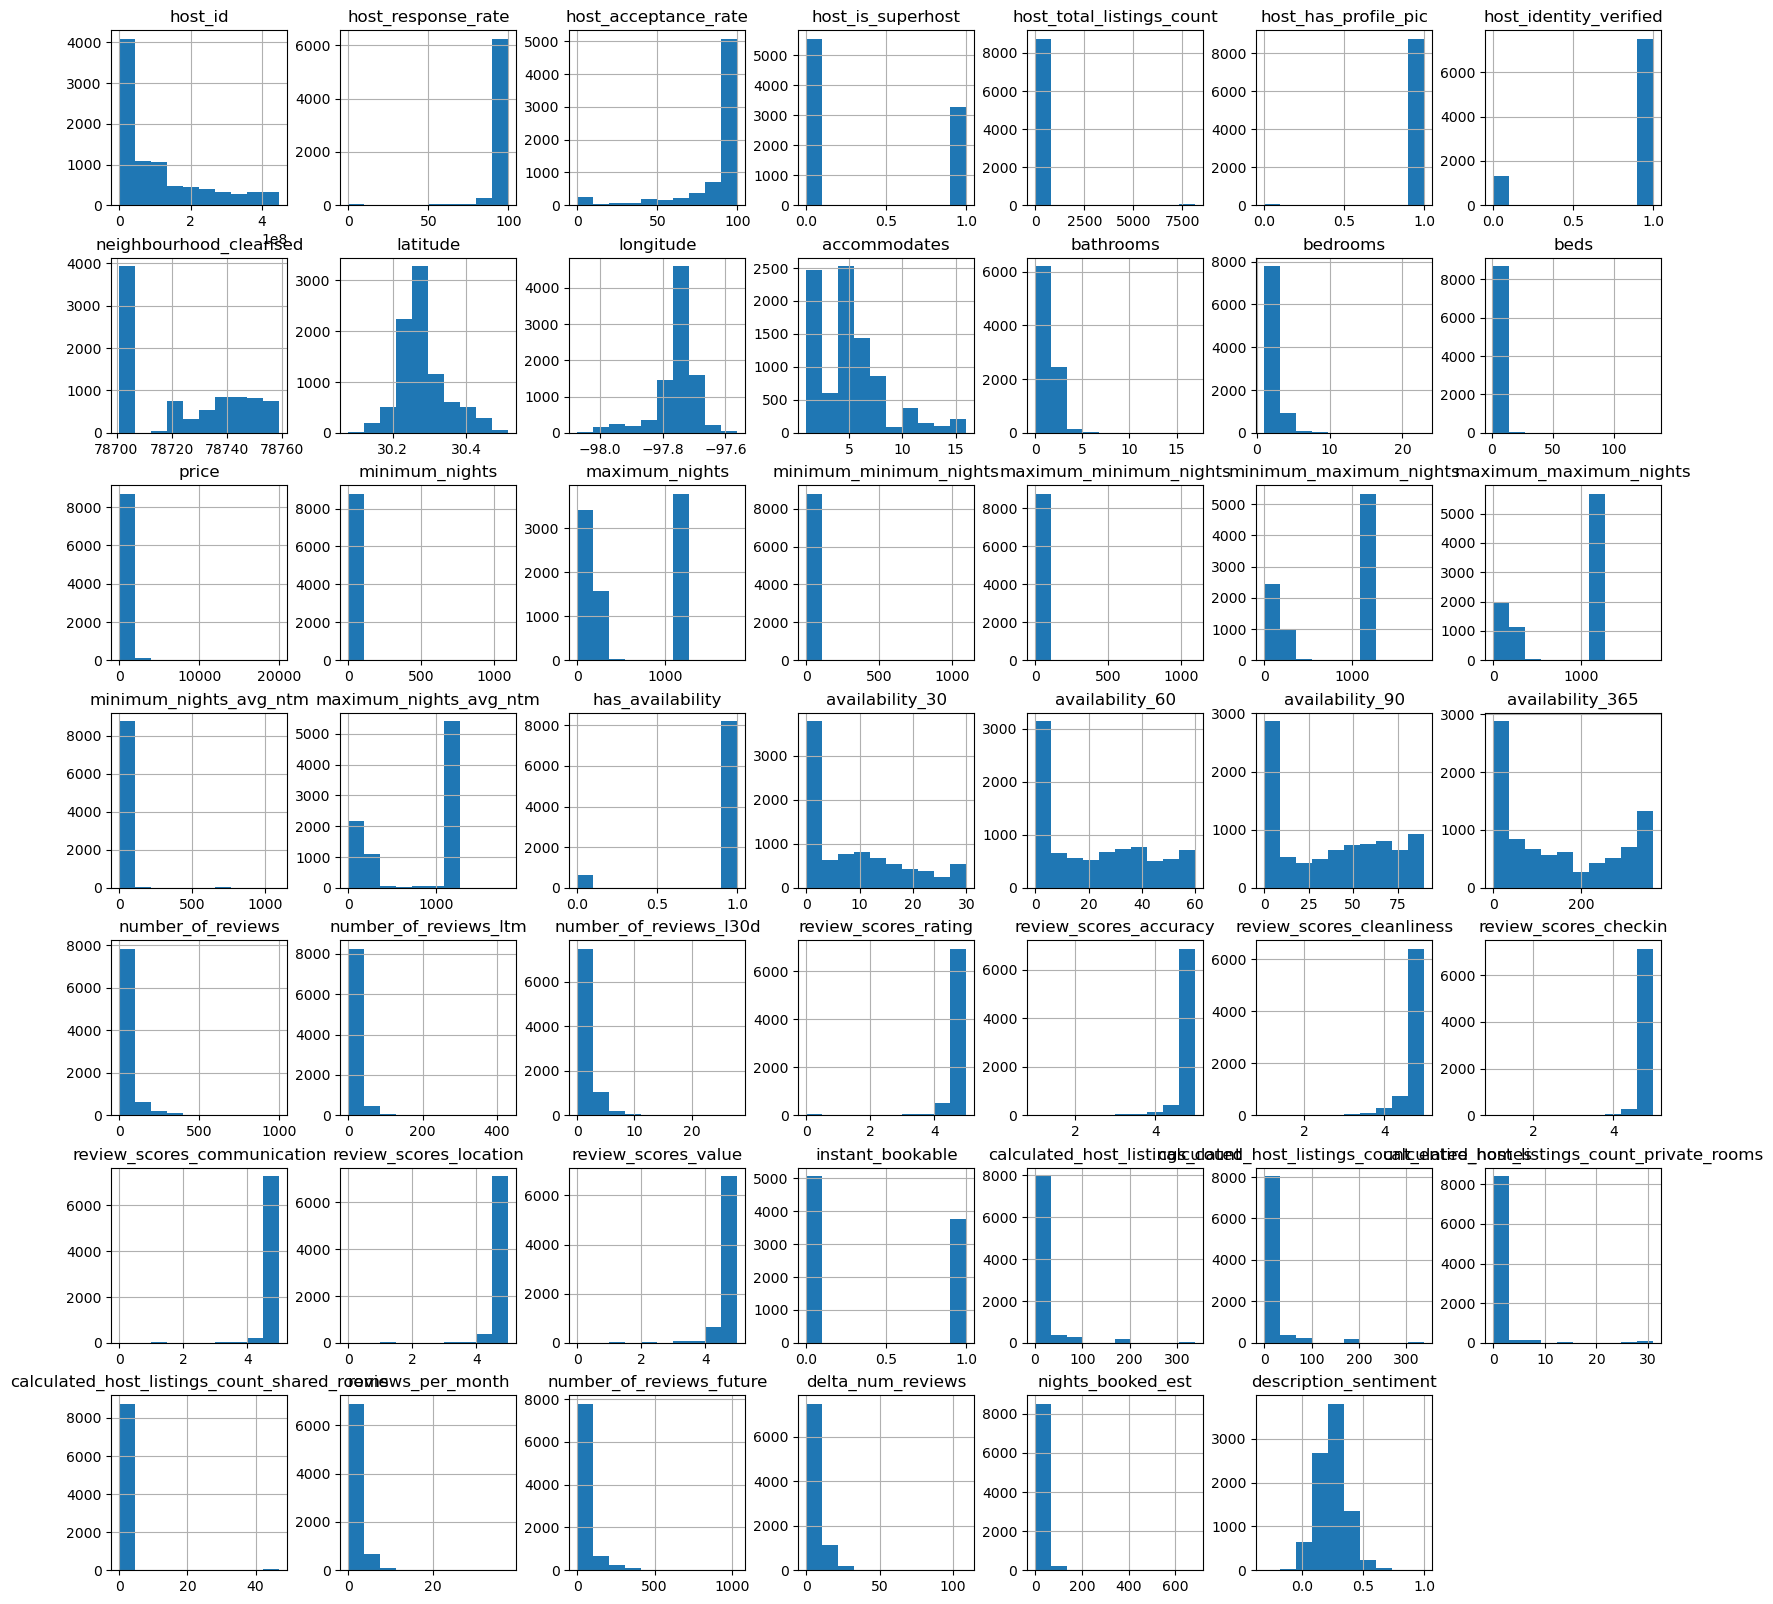

In [55]:
# Plot the numerical/boolean features
list_df.hist(figsize=(20,20))

Explore rows where reviews per month is null or number of reviews is null, possibly try to grab inactive listings, in the merged dataframe

In [56]:
# Check number of listings that have no reviews from where the reviews per month is null
test = merged[merged['reviews_per_month'].isna()]
(test['number_of_reviews'] == 0).sum()

1237

In [57]:
# Wherever there are no reviews
((merged['number_of_reviews'] == 0) & (merged['reviews_per_month'].isna())).sum()

1237

In [58]:
# Number of listings that have no availability for the upcoming year
(raw_list_df['availability_365'] == 0).sum()

3371

In [59]:
((raw_list_df['availability_365'] == 0) & (raw_list_df['number_of_reviews'] == 0)).sum()

1063

In [60]:
# Exploring the values where 
raw_list_df[raw_list_df['availability_365'] == 0]

listing_url  \
id                                                                    
5769                              https://www.airbnb.com/rooms/5769   
6413                              https://www.airbnb.com/rooms/6413   
69810                            https://www.airbnb.com/rooms/69810   
76925                            https://www.airbnb.com/rooms/76925   
77347                            https://www.airbnb.com/rooms/77347   
...                                                             ...   
54387980                      https://www.airbnb.com/rooms/54387980   
547867239355893747  https://www.airbnb.com/rooms/547867239355893747   
560217159619109244  https://www.airbnb.com/rooms/560217159619109244   
574950271247972161  https://www.airbnb.com/rooms/574950271247972161   
578271701261503721  https://www.airbnb.com/rooms/578271701261503721   

                         scrape_id last_scraped  \
id                                                
5769                20220312074014   2022-03-31   
6413                20220312074014   2022-03-31   
69810               20220312074014   2022-03-31   
76925               20220312074014   2022-03-31   
77347               20220312074014   2022-03-31   
...                            ...          ...   
54387980            20220312074014   2022-03-31   
547867239355893747  20220312074014   2022-03-12   
560217159619109244  20220312074014   2022-03-12   
574950271247972161  20220312074014   2022-03-12   
578271701261503721  20220312074014   2022-03-12   

                                                                 name  \
id                                                                      
5769                                                   NW Austin Room   
6413                                    Gem of a Studio near Downtown   
69810               Live Beneath Live Oaks in a Bright, Intimate H...   
76925                                       Comfy Digs in East Austin   
77347                                                   Room or rooms   
...                                                               ...   
54387980                  SXSW luxury compound! 4 units, sleeps 12-16   
547867239355893747    South Austin Menchaca  1 bedroom rental in unit   
560217159619109244        Urban Luxury 2BR Apts in South Shore Austin   
574950271247972161             LUXURY 1 BDR APT CLOSE TO ATX DOWNTOWN   
578271701261503721                                     Central Austin   

                                                          description  \
id                                                                      
5769                <b>The space</b><br />Looking for a comfortabl...   
6413                Great studio apartment, perfect a single perso...   
69810               Curl up with a book on the comfy window seat o...   
76925               Our beautiful 92 year old bungalow-style home,...   
77347               Wonderful master suite in large home with priv...   
...                                                               ...   
54387980            *Combined* listing, check our great reviews on...   
547867239355893747  Keep it simple at this peaceful and centrally-...   
560217159619109244  Revealing the essence of urban luxury in Austi...   
574950271247972161  The whole group will enjoy easy access to ever...   
578271701261503721  This stylish place to stay is perfect for fami...   

                                                neighborhood_overview  \
id                                                                      
5769                Quiet neighborhood with lots of trees and good...   
6413                Travis Heights is one of the oldest neighborho...   
69810               Located in the cool Dawson area, about two mil...   
76925               Our neighborhood has beautiful old trees, frie...   
77347               Park like setting with access to Lake Austin<b...   
...                                                      

Feature Names:
- `host_id`
- `host_since`
- `host_response_time`
- `host_response_rate`
- `host_acceptance_rate`
- `host_is_superhost`
- `host_total_listings_count`
- `host_has_profile_pic`
- `host_identity_verified`
- `latitude`
- `longitude`
- `property_type`
- `room_type`
- `accommodates`
- `bathrooms`
- `bedrooms`
- `beds`
- `amenities`
- `price`
- `minimum_nights`
- `maximum_nights`
- `minimum_minimum_nights`
- `maximum_minimum_nights`
- `minimum_maximum_nights`
- `maximum_maximum_nights`
- `minimum_nights_avg_ntm`
- `maximum_nights_avg_ntm`
- `has_availability`
- `availability_30`
- `availability_60`
- `availability_90`
- `availability_365`
- `calendar_last_scraped`
- `number_of_reviews`
- `number_of_reviews_ltm`
- `number_of_reviews_l30d`
- `first_review`
- `last_review`
- `review_scores_rating`
- `review_scores_accuracy`
- `review_scores_cleanliness`
- `review_scores_checkin`
- `review_scores_communication`
- `review_scores_location`
- `review_scores_value`
- `instant_bookable`
- `calculated_host_listings_count`
- `calculated_host_listings_count_entire_homes`
- `calculated_host_listings_count_private_rooms`
- `calculated_host_listings_count_shared_rooms`
- `reviews_per_month`


## Cleaning Individual Columns

### `host_since`

In [61]:
from datetime import datetime

# Convert to datetime
list_df['host_since'] = pd.to_datetime(list_df['host_since'])

# Date of data scrape, unique to each dataset
date_of_scrape = datetime(2022,3,12)

list_df['host_days_active'] = (date_of_scrape - list_df.host_since).astype('timedelta64[D]')

# get mean values of host acctiveness in austin
# Printing mean and median
print("Mean days as host:", round(list_df['host_days_active'].mean(),0))
print("Median days as host:", list_df['host_days_active'].median())

# replace missing values with the median
list_df['host_days_active'].fillna(list_df.host_days_active.median(), inplace=True)

Mean days as host: 2218.0
Median days as host: 2242.0


### `host_response_time`

About 28% of the listings do not have a value for host_response time. Good 1/3 portion of these null rows also do not have review data. 

#### Airbnb Website (https://www.airbnb.com/help/article/430)
response_time: Your response time is the average amount of time that it took for you to respond to all new messages in the past 30 days.

response_rate: Your response rate is the percentage of new inquiries and reservation requests you responded to (by either accepting/pre-approving or declining) within 24 hours in the past 30 days.


Specution: these listings are possibly 'inactive' listings, calendars closed or have prices notably higher than others in area. --> retain null rows with unknown label

Possible next step:
--> replace with mode label

In [62]:
list_df.host_response_time.value_counts()

within an hour        5385
within a few hours     787
within a day           473
a few days or more      66
Name: host_response_time, dtype: int64

In [63]:
null_num = list_df.host_response_time.isna().sum()

print("Null values:", null_num)
print("Proportion Null: ",null_num/len(list_df))

# Number of rows without a value for host_response_time which have also not yet had a review
len(list_df[list_df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])


Null values: 2125
Proportion Null:  0.240493435943866


131

In [64]:
# Replace null vals with unknown label
list_df.host_response_time.fillna("unknown", inplace=True)
list_df.host_response_time.value_counts(normalize=True)

within an hour        0.609439
unknown               0.240493
within a few hours    0.089067
within a day          0.053531
a few days or more    0.007469
Name: host_response_time, dtype: float64

### `host_response_rate`
First check the null values, same num rows null as host_response_time

Solution: bin into categories and replacce nulls with 'unknown' label

In [65]:
null_num = list_df['host_response_rate'].isna().sum()

print("Null values:", null_num)
print("Proportion Null: ",null_num/len(list_df))


Null values: 2125
Proportion Null:  0.240493435943866


In [66]:
# Bin into four categories
list_df['host_response_rate_bins'] = pd.cut(list_df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
list_df.host_response_rate_bins = list_df.host_response_rate_bins.astype('str')

# Replace nulls with 'unknown'
list_df.host_response_rate_bins.replace('nan', 'unknown', inplace=True)

# Category counts
list_df.host_response_rate_bins.value_counts()

100%       5377
unknown    2125
90-99%      694
50-89%      544
0-49%        96
Name: host_response_rate_bins, dtype: int64

### `host_acceptance_rate`

In [67]:
null_num = list_df['host_acceptance_rate'].isna().sum()

print("Null values:", null_num)
print("Proportion Null: ",null_num/len(list_df))

Null values: 1700
Proportion Null:  0.1923947487550928


In [68]:
# Bin into four categories
list_df['host_acceptance_rate_bins'] = pd.cut(list_df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
list_df.host_acceptance_rate_bins = list_df.host_response_rate_bins.astype('str')

# Replace nulls with 'unknown'
list_df.host_acceptance_rate_bins.replace('nan', 'unknown', inplace=True)

# Category counts
list_df.host_acceptance_rate_bins.value_counts()

100%       5377
unknown    2125
90-99%      694
50-89%      544
0-49%        96
Name: host_acceptance_rate_bins, dtype: int64

### `host_is_superhost`

Only 3/11k rows in the dataset lack value for this feature

Solution: drop these rows

In [69]:
list_df['host_is_superhost'].value_counts(dropna=False)

0.0    5560
1.0    3274
NaN       2
Name: host_is_superhost, dtype: int64

In [70]:
# Drop rows
list_df.dropna(subset=['host_since'], inplace=True)


### `property_type`

Lots of different values here, basically try to get differentiation between types like home, apartment, condo

In [71]:
# list the different property types
# list_df.property_type.value_counts()

In [72]:
# Helper function to get property type given the names
def process_prop_type(val):
    home_list = ['home', 'townhouse', 'residential','bungalow','cottage','villa','chalet', 'Tiny house','guesthouse']
    rental_unit_list = ['rental unit', 'apartment','loft']
    condo_list = ['condominium', 'condo']

    prop_types = {'Home': home_list,
                  'Apartment':rental_unit_list,
                  'Condo':condo_list,}
    
    for prop, names in prop_types.items():
        for name in names:
            if name in val:
                return prop
    
    return "Other"

list_df['property_type_clean'] = list_df['property_type'].apply(process_prop_type)


In [73]:
list_df['property_type_clean'].value_counts()

Home         5363
Apartment    2033
Condo         952
Other         486
Name: property_type_clean, dtype: int64

### `bathrooms`, `bedrooms`, `beds`

Change missing values for these features to the median value

In [74]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    list_df[col].fillna(list_df[col].median(), inplace=True)

### `amenities`

Detailed lists of additonal things in the property, think TV/wi-fi; save for later

In [75]:
list_df.amenities.values.tolist()[0]

'["Patio or balcony", "Hair dryer", "Security cameras on property", "Dishes and silverware", "Microwave", "Coffee maker", "TV", "Hangers", "Private entrance", "Heating", "Bed linens", "Extra pillows and blankets", "Wifi", "Shampoo", "Keypad", "Kitchen", "Iron", "Air conditioning", "Essentials", "Backyard", "Long term stays allowed", "Hot water", "Refrigerator", "Free street parking", "Luggage dropoff allowed", "Smoke alarm"]'

In [76]:
from collections import Counter

# Creating a set of all possible amenities
amenities_rows = list(list_df.amenities)
amenities_rows = [row.replace('[','').replace(']','').replace('"','') for row in amenities_rows]
all_amenities_list_string = ",".join(amenities_rows)
all_amenites = [amen.strip() for amen in all_amenities_list_string.split(',')]

# Use counter to get unique values and store their counts as well
amenities = list(Counter(all_amenites).keys())
counts = list(Counter(all_amenites).values())

In [77]:
# Get values sorted
srt = sorted(list(zip(counts,amenities)), reverse=True)

Store the output of the amenities list in a json file for further analysis.

In [78]:
import json

file_path = folder_choice + 'amenities.json'

with open(file_path, "w") as outfile:
    json.dump(srt, outfile, indent=4)
type(srt)

list

In [79]:
# Amenities with more than 10k occurences in dataset
gt_10k = [pair for pair in srt if pair[0] > 10000]
gt_10k

[]

In [80]:
# Amenities with less than 10k, greater than 7k occurences in dataset
bet_7k_10k = [pair for pair in srt if pair[0] <= 10000 and pair[0] > 6000]
bet_7k_10k

[(8454, 'Smoke alarm'),
 (8437, 'Wifi'),
 (8112, 'Kitchen'),
 (8081, 'Air conditioning'),
 (7970, 'Essentials'),
 (7137, 'Long term stays allowed'),
 (7075, 'Free parking on premises'),
 (6914, 'Heating'),
 (6908, 'Hangers'),
 (6875, 'Hair dryer'),
 (6705, 'Iron'),
 (6660, 'Shampoo'),
 (6598, 'Carbon monoxide alarm'),
 (6487, 'Washer'),
 (6411, 'Fire extinguisher'),
 (6217, 'Hot water')]

Analysis:
It seems that amenities like Wifi, Smoke alarm, Kitchen, and Air conditioning are ubiquitous among the listings. Since Wifi and these features are so common among listings, they will not help differentiate the listings. 

Other important amenities include:
- TV/Entertainment Electronics: "TV", "TV with standard cable", "HDTV with Amazon Prime Video", "Amazon Prime Video", "HDTV", "HDTV with Netflix", "TV with Roku"
"TV with Netflix", "TV with Amazon Prime Video", "HDTV"
- Air conditioning
- BBQ Grill, accessories
- Patio
- Pool, hot tub
- Cooking basics
- Security camera
- Parking

Extract features from the amenities column and store it in the main dataframe

In [81]:
tv_list = ["TV", "TV with standard cable", "HDTV with Amazon Prime Video", "Amazon Prime Video", "HDTV", "HDTV with Netflix", "TV with Roku", "TV with Netflix", "TV with Amazon Prime Video", "HDTV"]
parking_list = ["Free parking on premises", "Free street parking", "Free driveway parking on premises", "Free parking"]

list_df['amenities_TV'] = list_df['amenities'].str.contains('|'.join(tv_list)).replace({True: 1, False: 0})
list_df['amenities_cooking'] = list_df['amenities'].str.contains('Cooking basics').replace({True: 1, False: 0})
list_df['amenities_bathtub'] = list_df['amenities'].str.contains('Bathtub').replace({True: 1, False: 0})
list_df['amenities_security_cameras'] = list_df['amenities'].str.contains('Security cameras').replace({True: 1, False: 0})
list_df['amenities_laundry'] = list_df['amenities'].str.contains('Washer|Dryer').replace({True: 1, False: 0})
list_df['amenities_parking'] = list_df['amenities'].str.contains('|'.join(parking_list)).replace({True: 1, False: 0})
list_df['amenities_bbq'] = list_df['amenities'].str.contains('BBQ grill').replace({True: 1, False: 0})
list_df['amenities_luggage_dropoff'] = list_df['amenities'].str.contains("Luggage dropoff allowed").replace({True: 1, False: 0})
list_df['amenities_pool_hot_tub'] = list_df['amenities'].str.contains("Pool|pool|Hot tub|hot tub").replace({True: 1, False: 0})


### `minimum_nights`, `maximum_nights`
There are eight columns relating to the min num and max num of night stay


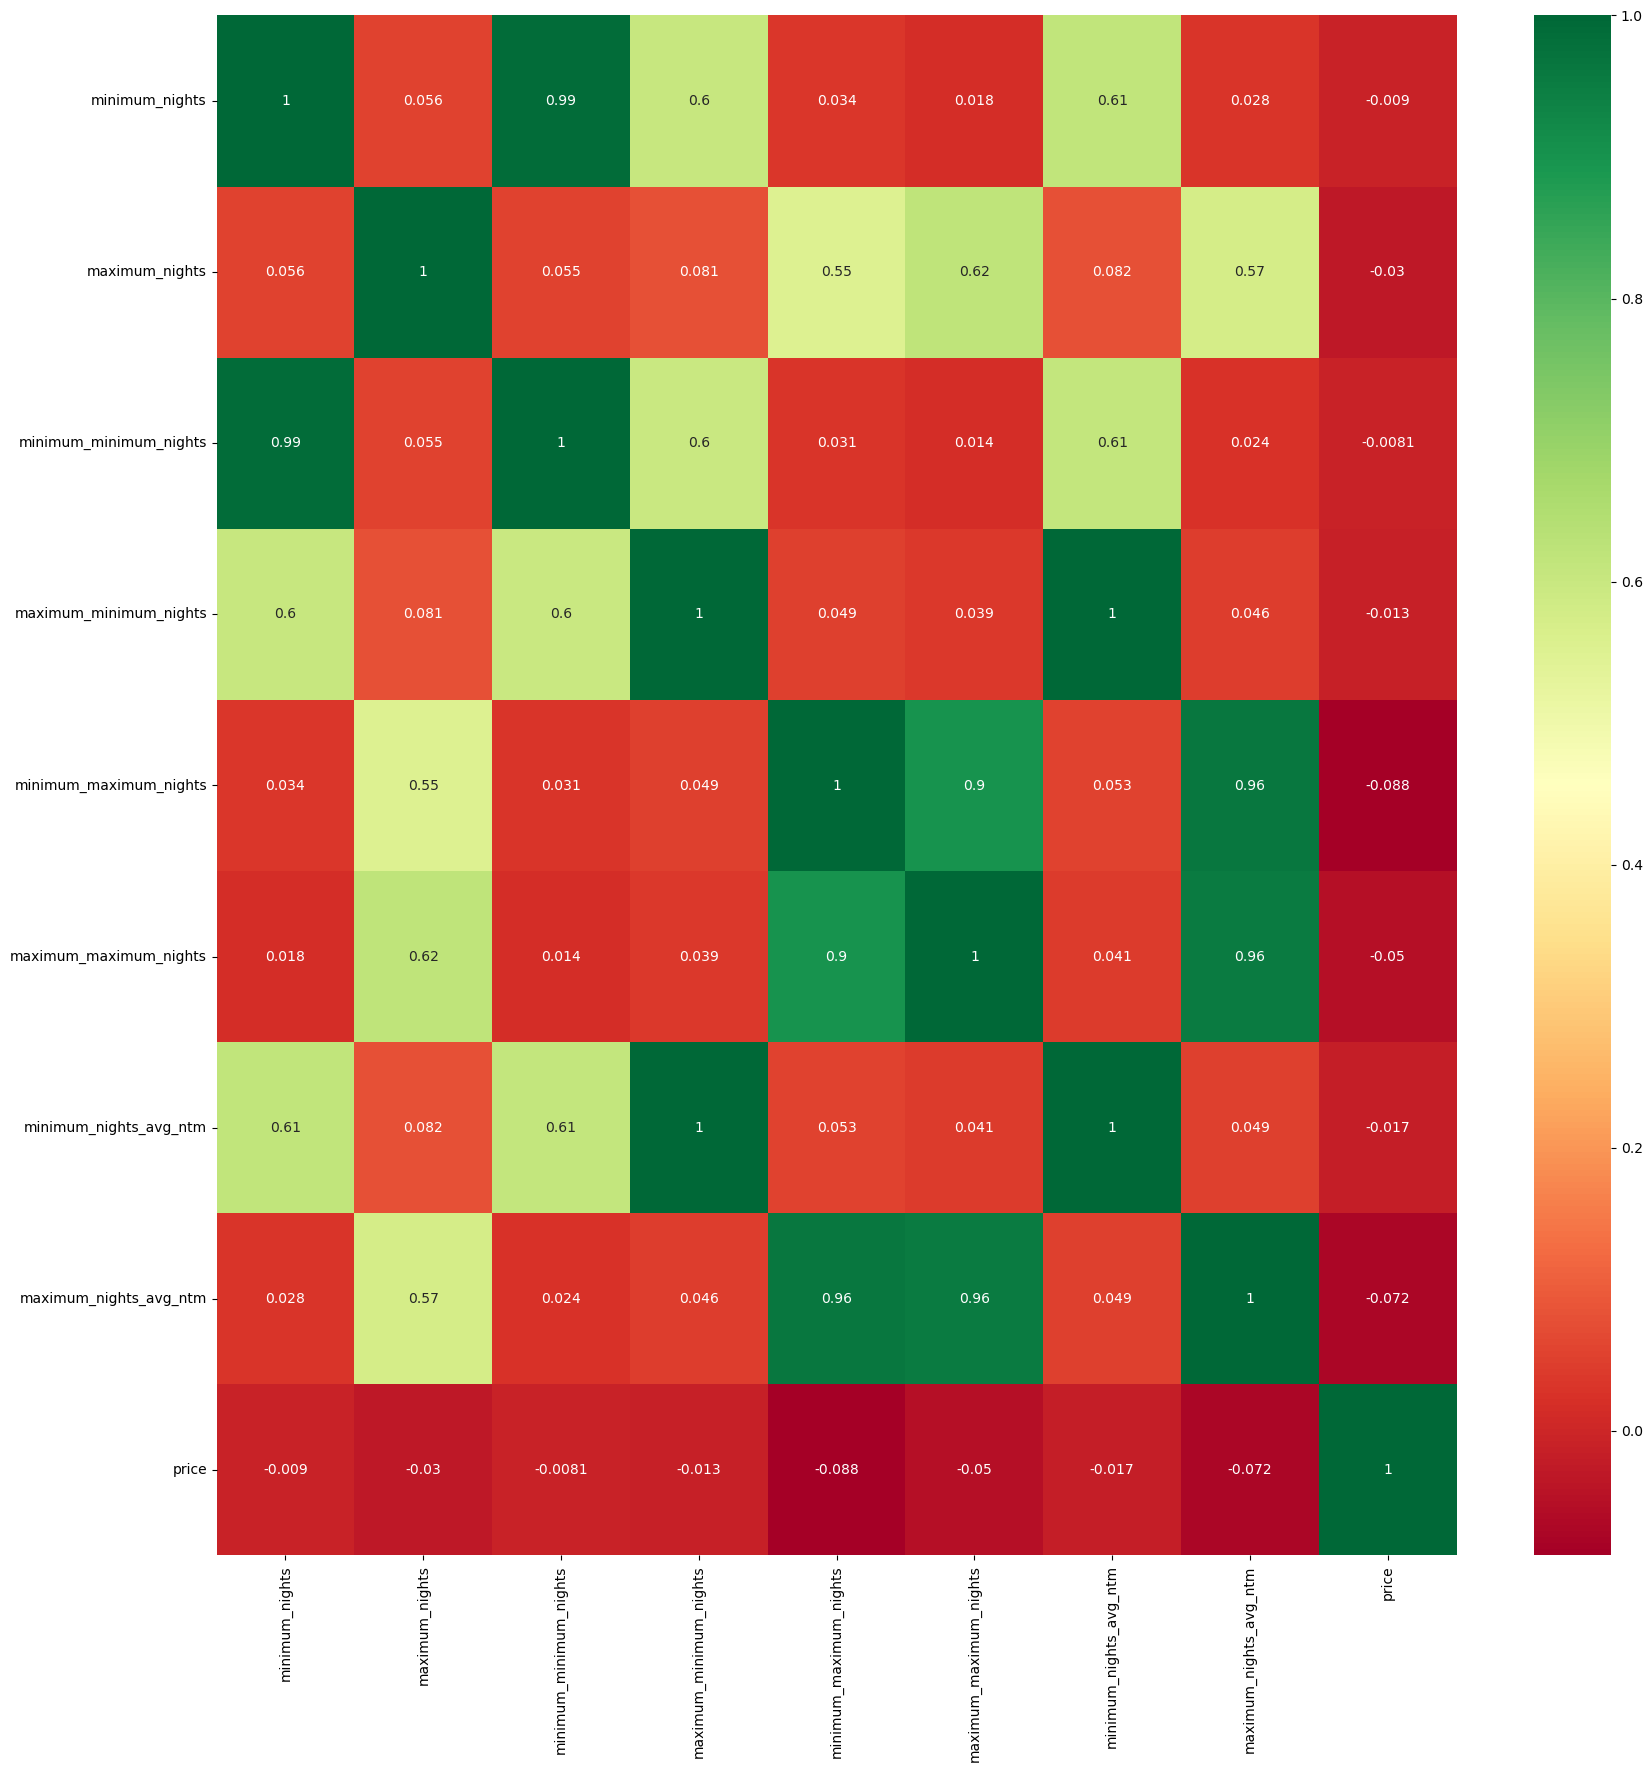

In [82]:
cols = ['minimum_nights','maximum_nights',
        'minimum_minimum_nights','maximum_minimum_nights',
        'minimum_maximum_nights','maximum_maximum_nights',
        'minimum_nights_avg_ntm','maximum_nights_avg_ntm','price']
df_int = list_df[cols]

# Analyze correlation between these variables
correlation = df_int.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

In [83]:
# Drop columns that are tightly related
list_df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 
                'minimum_maximum_nights', 'maximum_maximum_nights'], axis=1, inplace=True)

Missing values: replace with median value

### `Availability columns`

Notice that the availability. Decision, drop 60 and 90 because those are the most closely related to each other.

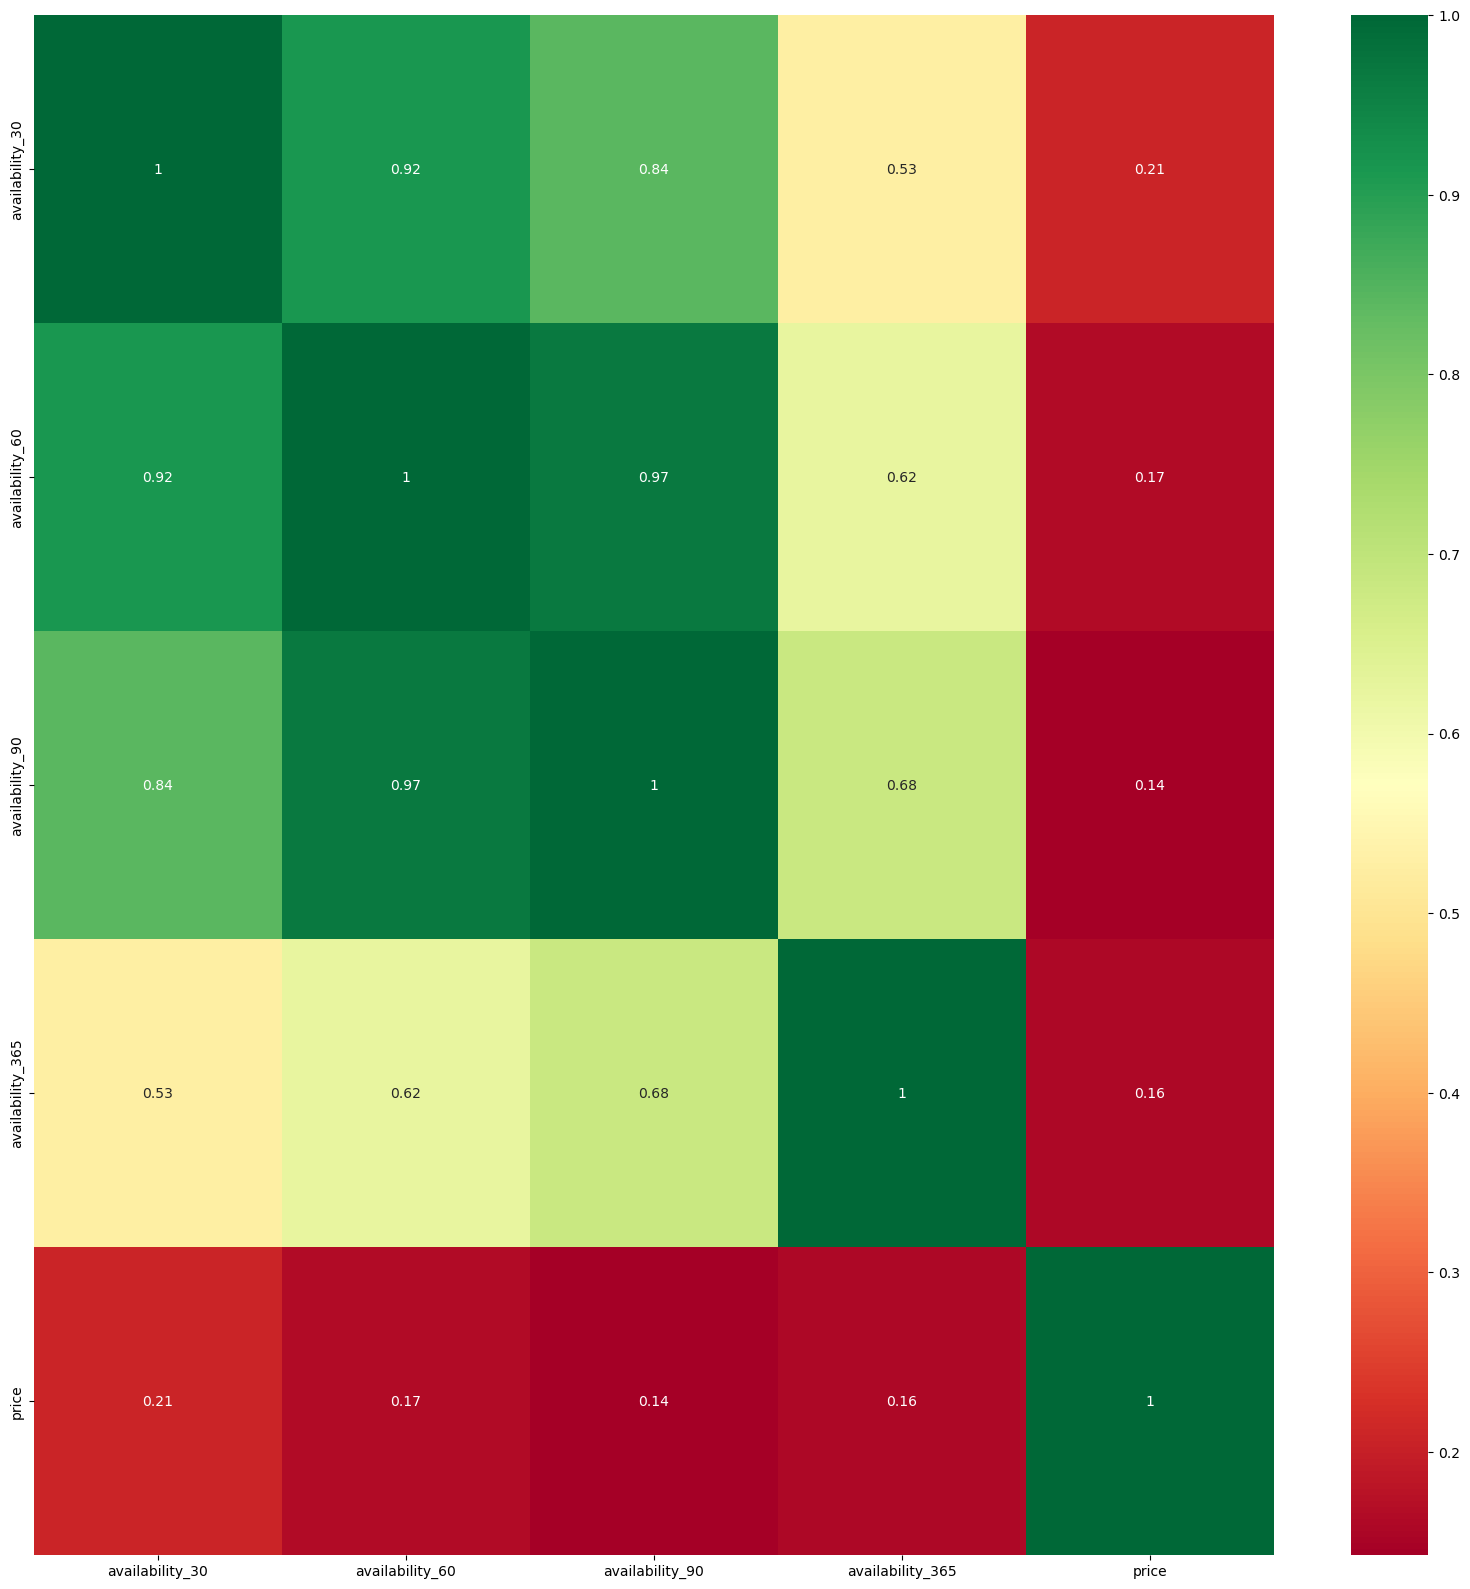

In [84]:
cols = ['availability_30','availability_60','availability_90','availability_365','price']

list_df.groupby(['has_availability'])['price'].mean()

df_int = list_df[cols]
# Analyze correlation between these variables
correlation = df_int.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()


In [85]:
list_df.drop(['availability_60', 'availability_365'], axis=1, inplace=True)

### `first_review`,  `last_review`



In [86]:
print(f"Null values in 'first_review': {round(100*list_df.first_review.isna().sum()/len(list_df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*list_df.review_scores_rating .isna().sum()/len(list_df),1)}%")

Null values in 'first_review': 13.5%
Null values in 'review_scores_rating': 13.5%


In [87]:
list_df.first_review = pd.to_datetime(list_df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
list_df['time_since_first_review'] = (date_of_scrape - list_df.first_review).astype('timedelta64[D]')

<AxesSubplot: >

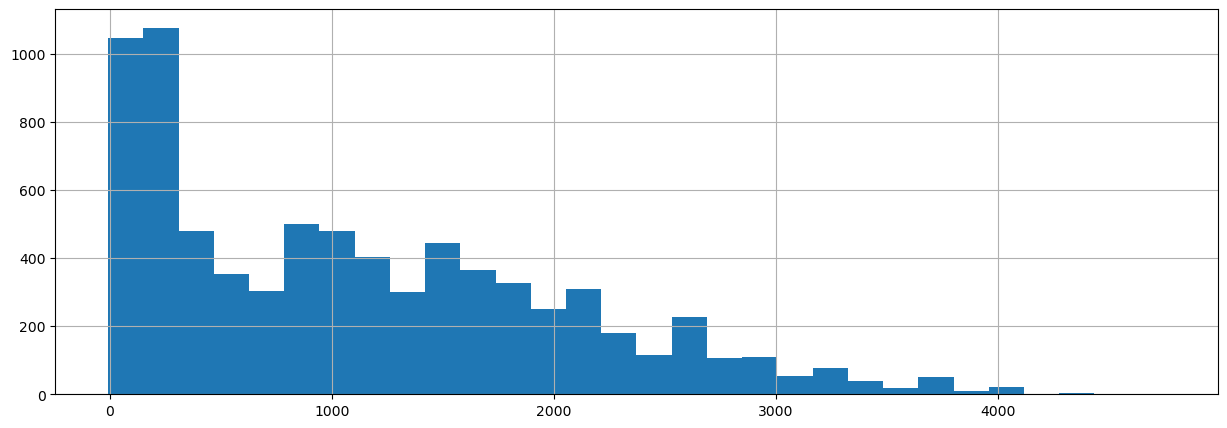

In [88]:
# Plot days since first review
list_df.time_since_first_review.hist(figsize=(15,5), bins=30)

In [89]:
def bin_column(df, col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].replace('nan', na_label, inplace=True)
    df[col].fillna(na_label, inplace=True)

In [90]:
# Binning time since first review
bin_column(list_df, 'time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(list_df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

Repeat same process for `last review`

<AxesSubplot: >

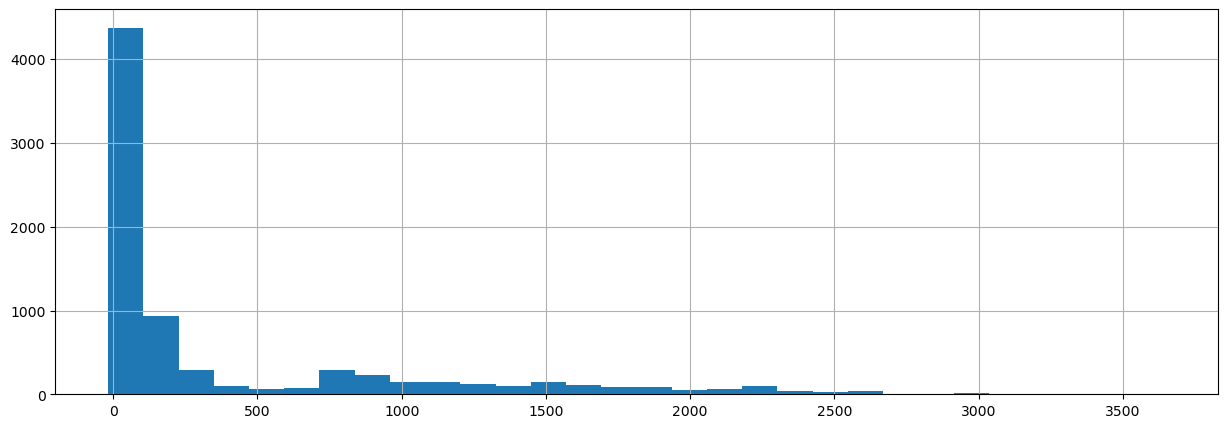

In [91]:
list_df.last_review = pd.to_datetime(list_df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
list_df['time_since_last_review'] = (date_of_scrape - list_df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
list_df.time_since_last_review.hist(figsize=(15,5), bins=30)

In [92]:
# Binning these columns in a siilar manner
bin_column(list_df, 'time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(list_df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [93]:
list_df['time_since_last_review'].value_counts()

0-2 weeks      2181
1+ year        2030
2-8 weeks      1538
2-6 months     1355
no reviews     1264
6-12 months     466
Name: time_since_last_review, dtype: int64

## `review` ratings features

Many listings don't have review data and should be kept, the raw values are decently correlated, rendering some multi-collinearity

In [94]:
variables_to_plot = list(list_df.columns[list_df.columns.str.startswith("review_scores") == True])

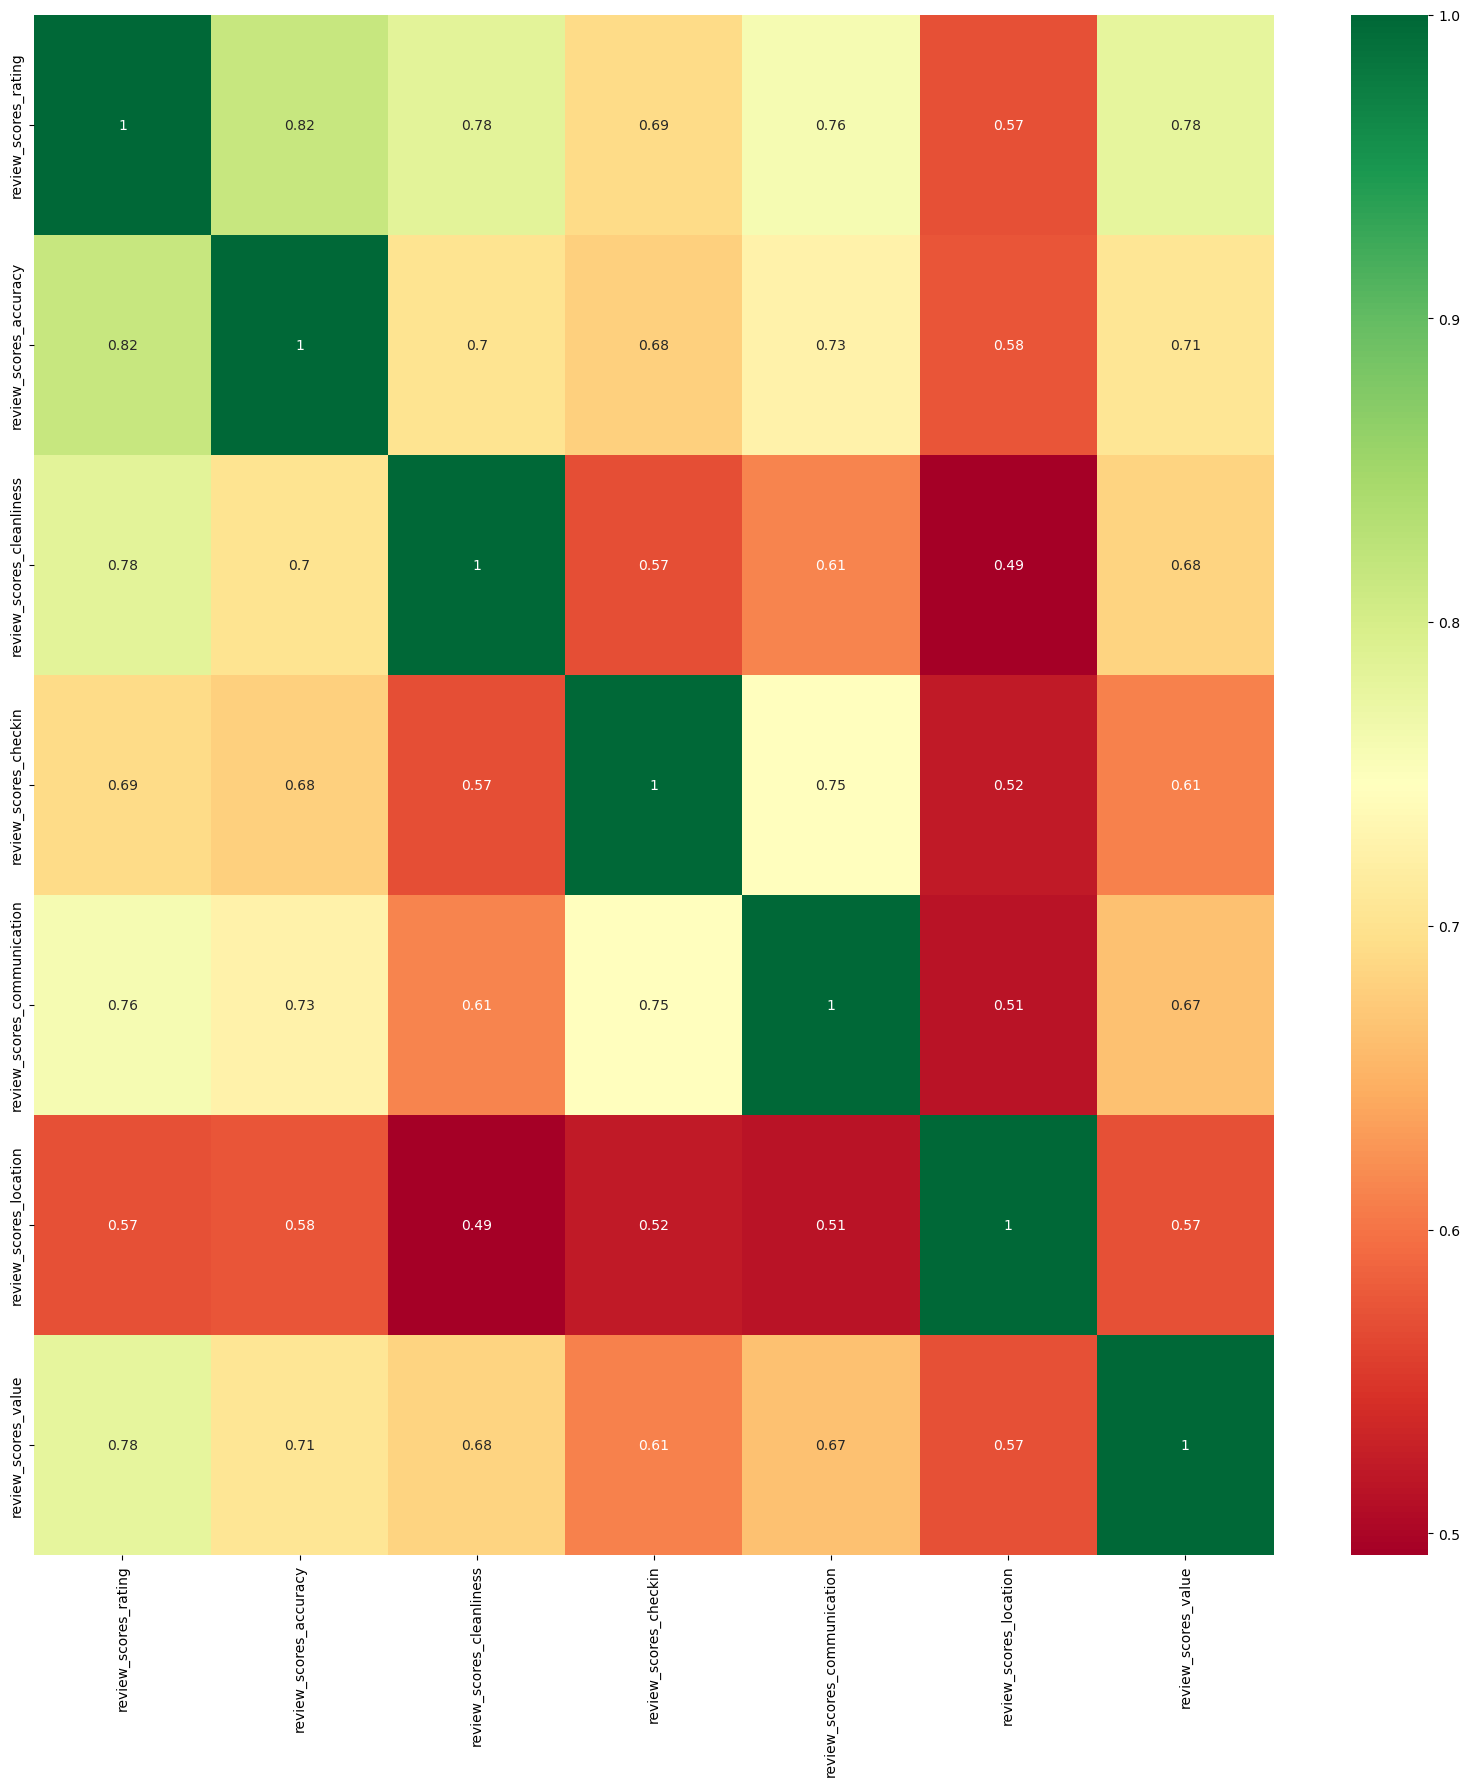

In [95]:
correlation = list_df[variables_to_plot].corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

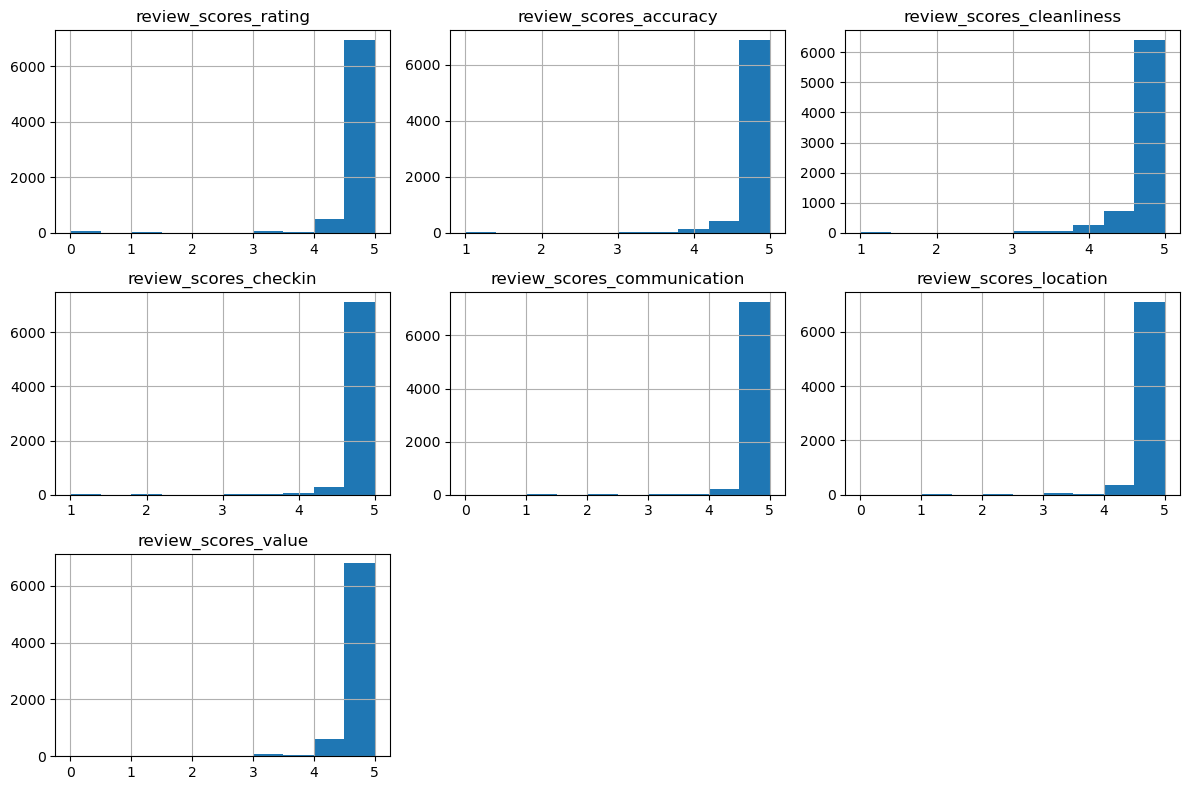

In [96]:
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    list_df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Bin each of the review columns

In [97]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(list_df, col,
               bins=[0, 4, 4.5, 5],
               labels=['0-4', '4-4.5', '5'],
               na_label='no reviews')

In [98]:
list_df['review_scores_accuracy'].value_counts()

5             6989
no reviews    1251
4-4.5          347
0-4            247
Name: review_scores_accuracy, dtype: int64

##### `reviews_per_month`

Has 2k null vals so drop it, also tightly correlated with others

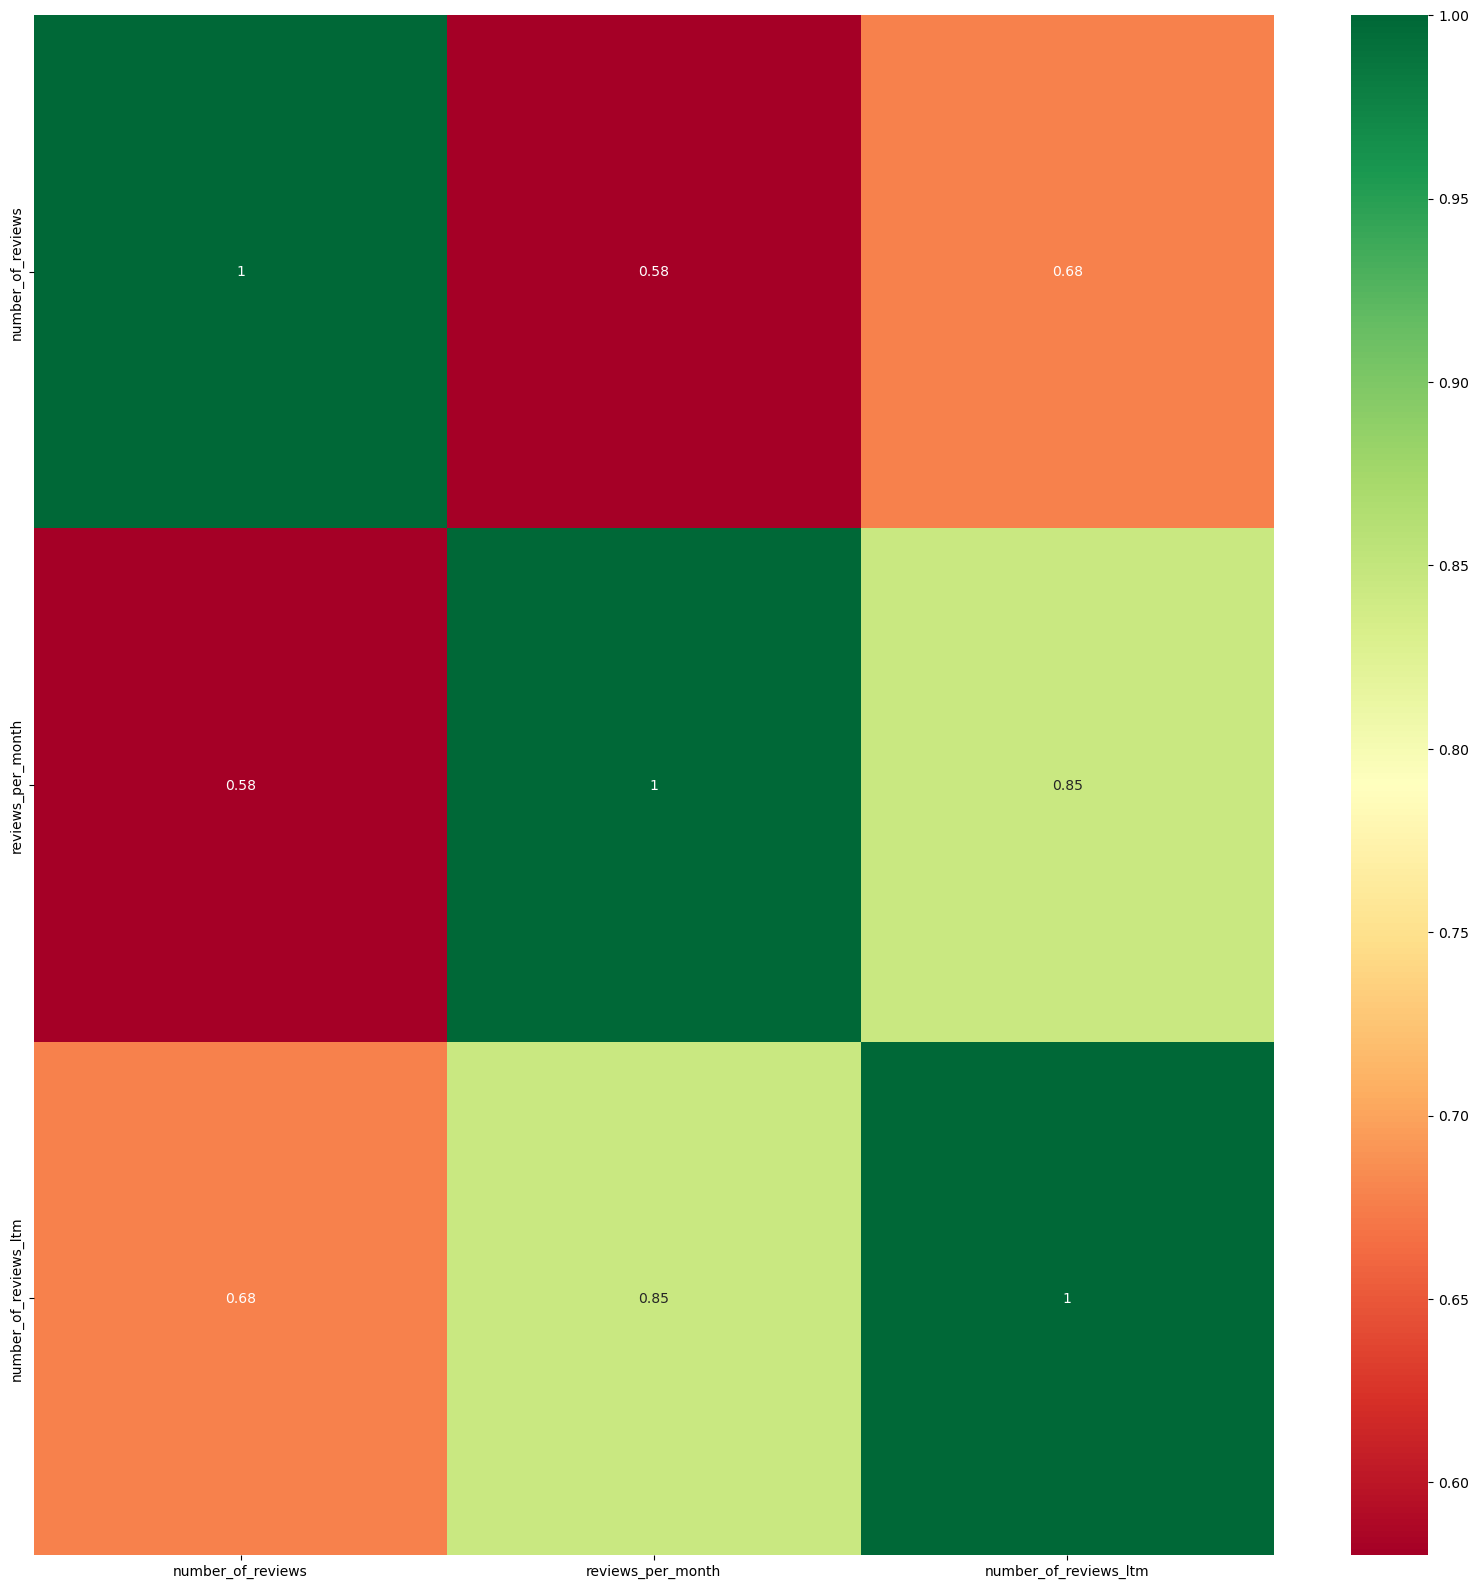

In [99]:
cols = ['number_of_reviews','reviews_per_month','number_of_reviews_ltm']

df_int = list_df[cols]
# Analyze correlation between these variables
correlation = df_int.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

In [100]:
list_df.drop(['reviews_per_month'], axis=1, inplace=True)

In [101]:
list_df.isnull().sum()

host_id                                            0
host_since                                         0
host_response_time                                 0
host_response_rate                              2123
host_acceptance_rate                            1698
host_is_superhost                                  0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
amenities                                     

Write cleaned CSV to folder

In [102]:
listings_cleaned = list_df.to_csv('./airbnb_data/austin/03-2022/listings_cleaned_future.csv', index = id, header=True)

array([[<AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'host_since'}>,
        <AxesSubplot: title={'center': 'host_response_rate'}>,
        <AxesSubplot: title={'center': 'host_acceptance_rate'}>,
        <AxesSubplot: title={'center': 'host_is_superhost'}>,
        <AxesSubplot: title={'center': 'host_total_listings_count'}>,
        <AxesSubplot: title={'center': 'host_has_profile_pic'}>],
       [<AxesSubplot: title={'center': 'host_identity_verified'}>,
        <AxesSubplot: title={'center': 'neighbourhood_cleansed'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>],
       [<AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
   

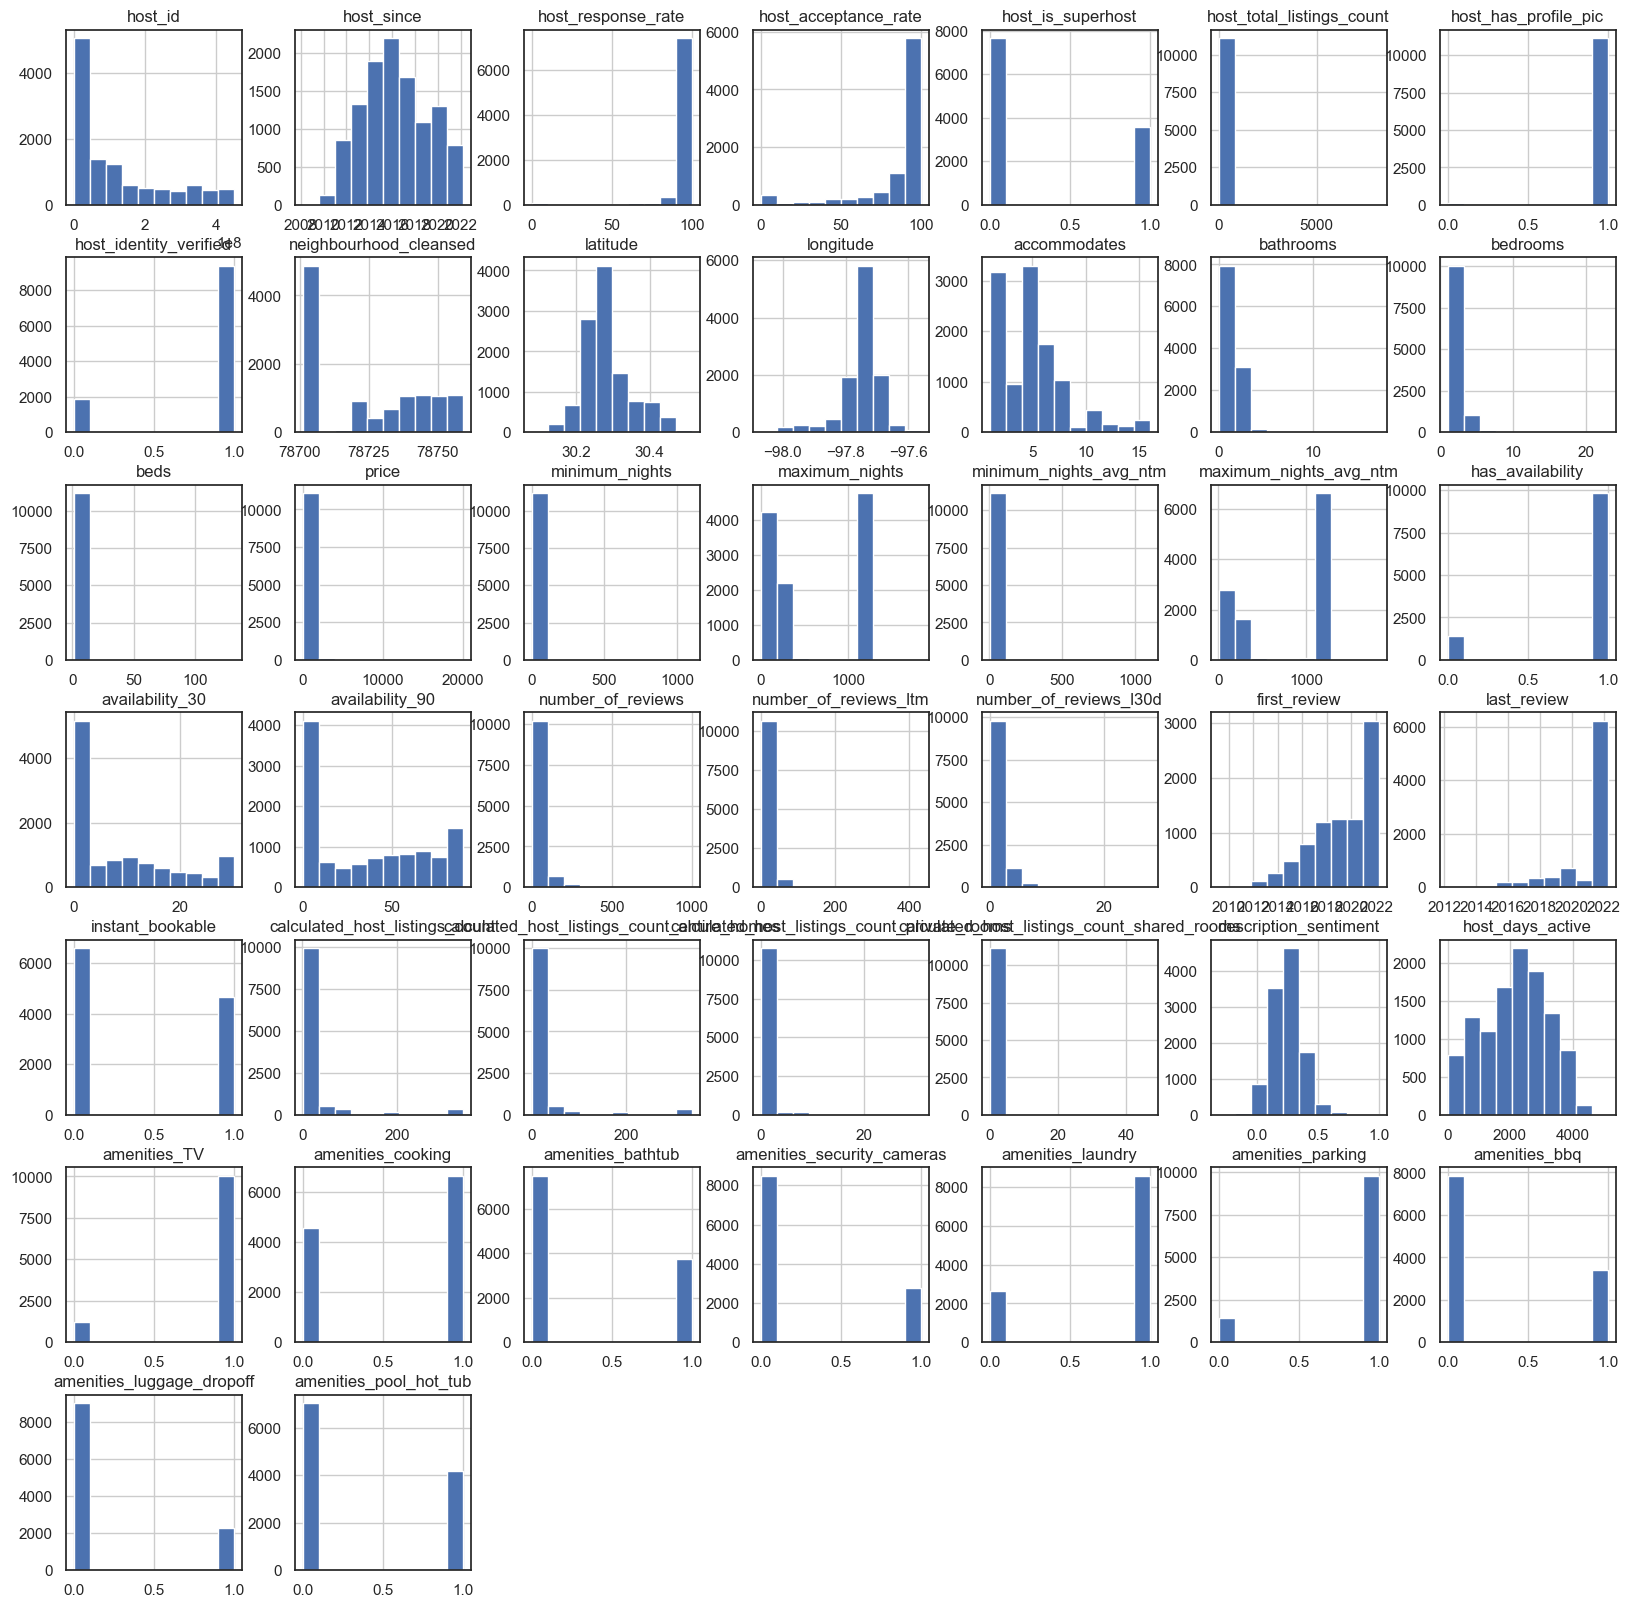

In [263]:
# Plot the numerical/boolean features
list_df.hist(figsize=(20,20))

<AxesSubplot: xlabel='description_sentiment', ylabel='Count'>

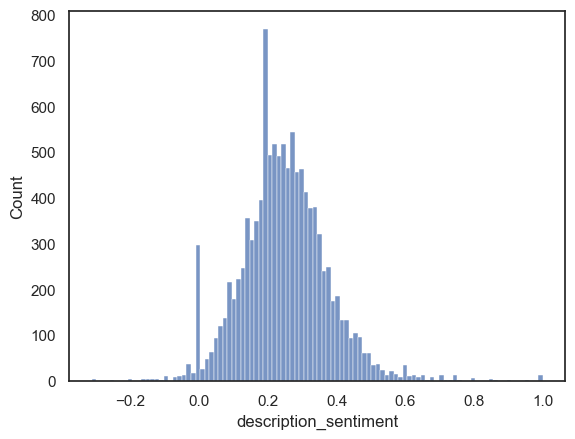

In [264]:
sns.histplot(data=list_df, x='description_sentiment')

Boolean columns that need to be cconverted to int:
- host_is_superhost
- host_identity_verified
- instant_bookable

In [178]:
list_df.head()

host_id host_since host_response_time  host_response_rate  \
id                                                                 
5456      8028 2009-02-16     within an hour               100.0   
5769      8186 2009-02-19            unknown                 NaN   
6448     14156 2009-04-20     within an hour               100.0   
8502     25298 2009-07-11       within a day                83.0   
13035    50793 2009-11-02     within an hour               100.0   

       host_acceptance_rate  host_is_superhost  host_total_listings_count  \
id                                                                          
5456                   94.0                1.0                        1.0   
5769                  100.0                1.0                        1.0   
6448                   98.0                1.0                        2.0   
8502                   29.0                0.0                        1.0   
13035                  95.0                1.0                        1.0   

       host_has_profile_pic  host_identity_verified  neighbourhood_cleansed  \
id                                                                            
5456                    1.0                     1.0                   78702   
5769                    1.0                     1.0                   78729   
6448                    1.0                     1.0                   78704   
8502                    1.0                     0.0                   78741   
13035                   1.0                     1.0                   78702   

       latitude  longitude            property_type        room_type  \
id                                                                     
5456   30.26057  -97.73441        Entire guesthouse  Entire home/apt   
5769   30.45697  -97.78422     Private room in home     Private room   
6448   30.26034  -97.76487        Entire guesthouse  Entire home/apt   
8502   30.23466  -97.73682       Entire guest suite  Entire home/apt   
13035  30.26098  -97.73072  Entire residential home  Entire home/apt   

       accommodates  bathrooms  bedrooms  beds  \
id                                               
5456              3        1.0       1.0   2.0   
5769              2        1.0       1.0   1.0   
6448              3        1.0       1.0   2.0   
8502              2        1.0       1.0   1.0   
13035             3        2.0       2.0   2.0   

                                               amenities  price  \
id                                                                
5456   ["Patio or balcony", "Hair dryer", "Security c...  240.0   
5769   ["Essentials", "Hair dryer", "Hot water", "Hea...   42.0   
6448   ["Toaster", "Ceiling fan", "Outlet covers", "C...  325.0   
8502   ["Essentials", "Kitchen", "Host greets you", "...   44.0   
13035  ["Toaster", "Bathtub", "Ceiling fan", "Private...  250.0   

       minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
id                                                              
5456                2              90                     2.0   
5769                1              14                     1.0   
6448                3             365                     3.0   
8502                3              90                     3.4   
13035              30             180                    30.0   

       maximum_nights_avg_ntm  has_availability  availability_30  \
id                                                                 
5456                     90.0                 1                7   
5769                     14.0                 1                0   
6448                   1125.0                 1                9   
8502                     90.0                 1                0   
13035                   180.0                 1                0   

       availability_90 calendar_last_scraped  number_of_reviews  \
id                                                                
5456                44            2022-03-1

### Data Visualizations

<AxesSubplot: xlabel='bedrooms'>

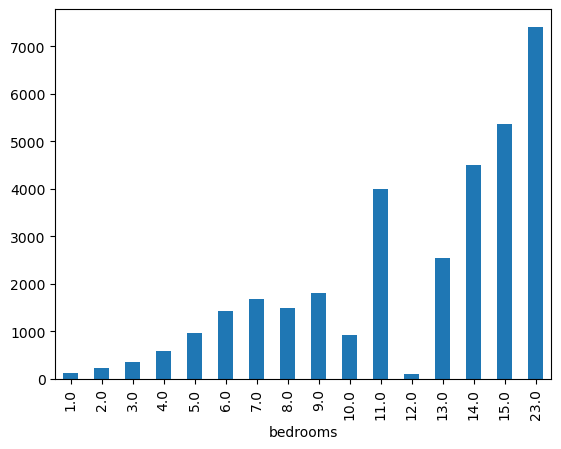

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


list_df.groupby('bedrooms').price.median().plot(kind='bar')

<AxesSubplot: xlabel='price', ylabel='Count'>

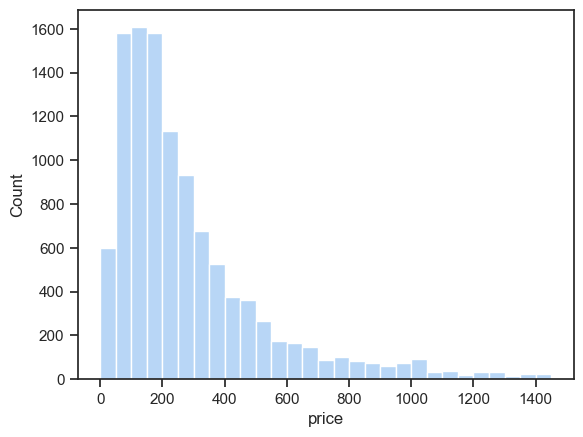

In [29]:
sns.histplot(data=list_df, x="price", bins=np.arange(0,1500,50))

<AxesSubplot: xlabel='room_type', ylabel='price'>

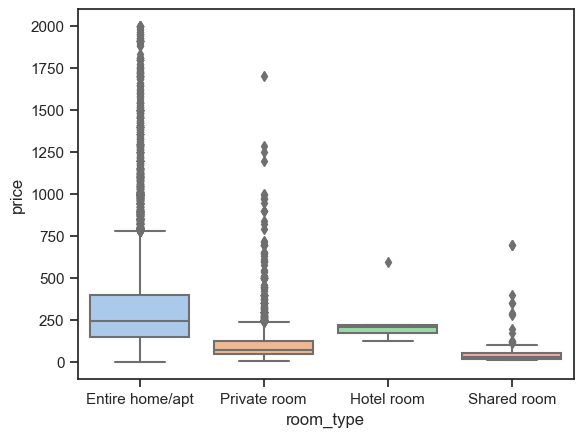

In [30]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="room_type", y="price", data=list_df[list_df['price']<2000])

## Initial Model

Focused mostly on numerical features, goal is to predict price

In [28]:
# General imports modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [29]:
list_df_init = list_df.drop(['host_response_rate','host_acceptance_rate'], axis=1)
cols_to_keep = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
                'latitude','longitude','room_type','accommodates','bathrooms_text',
                'bedrooms','beds','price','minimum_nights','maximum_nights','has_availability',
                'availability_30','availability_60','availability_90','availability_365','number_of_reviews',
                'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating','instant_bookable',
                'calculated_host_listings_count','reviews_per_month', 'dist_downtown']

list_df_init = list_df_init[cols_to_keep].dropna()

NameError: name 'list_df' is not defined

In [296]:
# Prep data for modeling purposes
mod_df = pd.get_dummies(list_df_init, drop_first=True)
mod_df.head()

host_is_superhost  host_has_profile_pic  host_identity_verified  latitude  \
0                1.0                   1.0                     1.0  30.26057   
1                1.0                   1.0                     1.0  30.45697   
3                1.0                   1.0                     1.0  30.26034   
4                0.0                   1.0                     0.0  30.23466   
5                1.0                   1.0                     1.0  30.26098   

   longitude  accommodates  bathrooms_text  bedrooms  beds  price  \
0  -97.73441             3             1.0       1.0   2.0  240.0   
1  -97.78422             2             1.0       1.0   1.0   42.0   
3  -97.76487             3             1.0       1.0   2.0  325.0   
4  -97.73682             2             1.0       1.0   1.0   44.0   
5  -97.73072             3             2.0       2.0   2.0  250.0   

   minimum_nights  maximum_nights  has_availability  availability_30  \
0               2              90                 1                7   
1               1              14                 1                0   
3               3             365                 1                9   
4               3              90                 1                0   
5              30             180                 1                0   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               18               44               305                585   
1                0                0                 0                264   
3               19               39               107                268   
4                0               26                26                 48   
5                4                4               207                 14   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                     42                       5                  4.83   
1                      3                       0                  4.90   
3                     30                       3                  4.97   
4                      2                       0                  4.53   
5                      2                       0                  5.00   

   instant_bookable  calculated_host_listings_count  reviews_per_month  \
0                 0                               1               3.69   
1                 0                               1               1.81   
3                 1                               1               2.09   
4                 0                               1               0.33   
5                 0                               2               0.10   

   dist_downtown  room_type_Hotel room  room_type_Private room  \
0       1.038348                     0                       0   
1      12.900714                     0                       1   
3       1.498868                     0                       0   
4       2.672810                     0                       0   
5       1.158988                     0                       0   

   room_type_Shared room  
0                      0  
1                      0  
3                      0  
4                      0  
5                      0

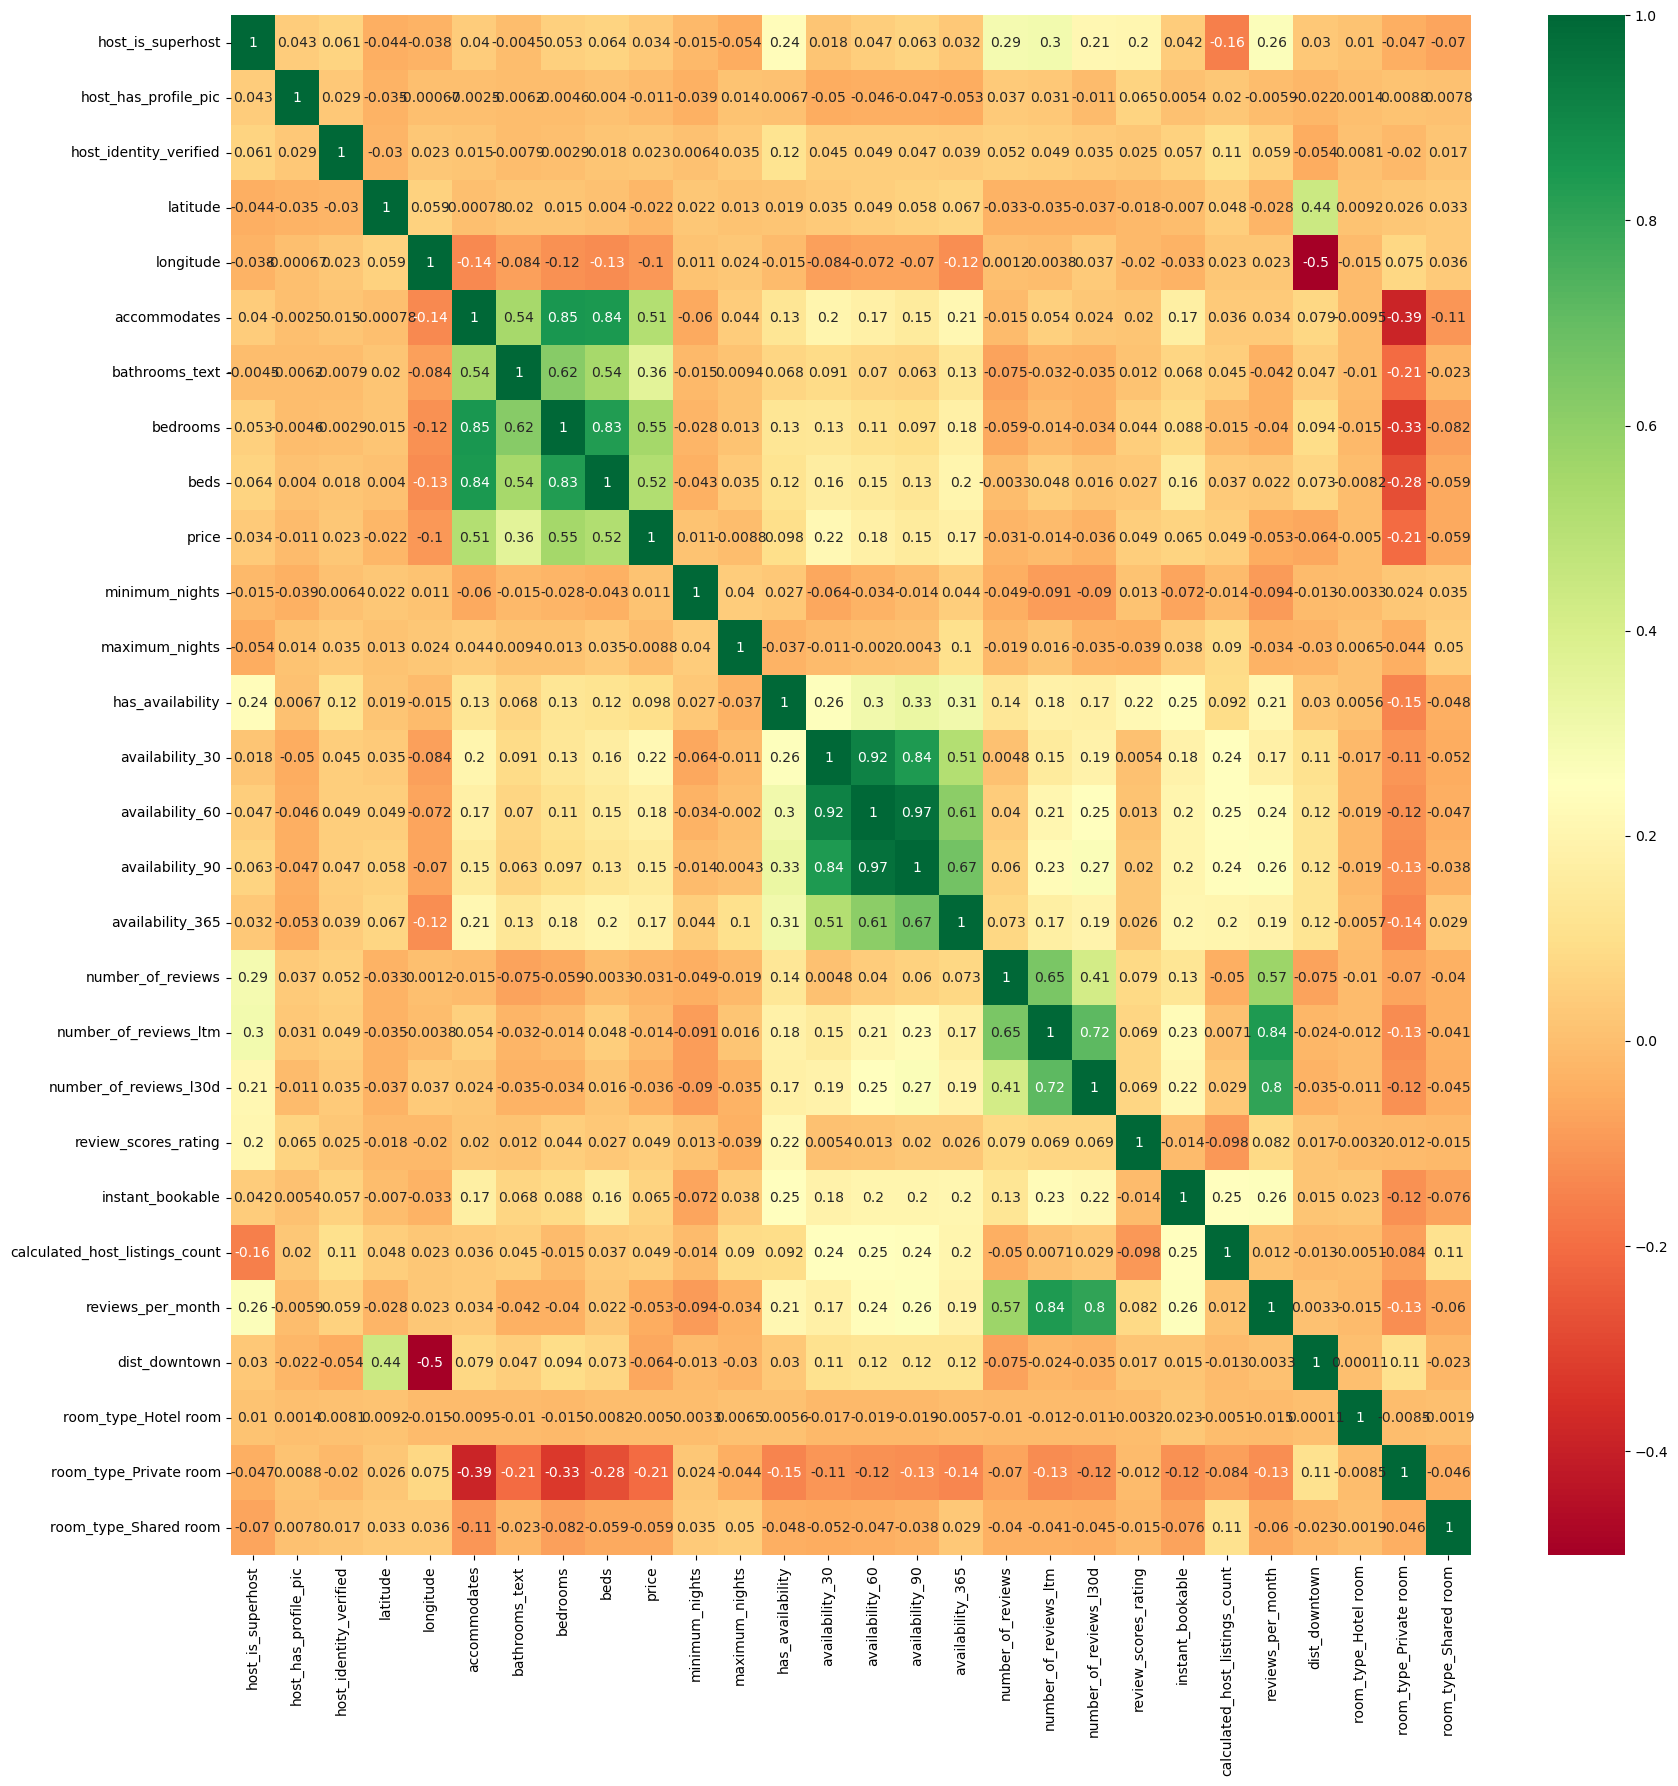

In [297]:
# Correlation heatmap
correlation = mod_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

In [272]:
# Separating X and y
X = mod_df.drop('price', axis=1)
Y = mod_df['price']

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

# Test train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [273]:
# Basic linear model
mod = LinearRegression()
mod.fit(X_train, Y_train)

Y_train_pred  = mod.predict(X_train)
Y_test_pred = mod.predict(X_test)

print("\nTraining RMSE:", round(mean_squared_error(Y_train, Y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(Y_test, Y_test_pred),4))
print("\nTraining r2:", round(r2_score(Y_train, Y_train_pred),4))
print("Validation r2:", round(r2_score(Y_test, Y_test_pred),4))


Training RMSE: 138327.3203
Validation RMSE: 264576.737

Training r2: 0.3809
Validation r2: 0.2474


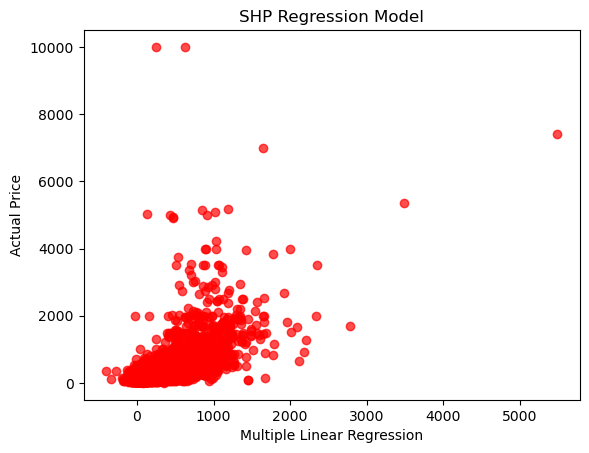

In [274]:
actual_values = Y_train
plt.scatter(Y_train_pred, actual_values, alpha=.7,
            color='r') #alpha helps to show overlapping data
plt.xlabel('Multiple Linear Regression')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [275]:
# Basic linear model
mod = linear_model.Lasso()
mod.fit(X_train, Y_train)

Y_train_pred  = mod.predict(X_train)
Y_test_pred = mod.predict(X_test)

print("\nTraining RMSE:", round(mean_squared_error(Y_train, Y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(Y_test, Y_test_pred),4))
print("\nTraining r2:", round(r2_score(Y_train, Y_train_pred),4))
print("Validation r2:", round(r2_score(Y_test, Y_test_pred),4))


Training RMSE: 138391.9226
Validation RMSE: 264509.7748

Training r2: 0.3806
Validation r2: 0.2476


In [276]:
# SVR model
from sklearn.svm import SVR

# Basic linear model
mod = SVR(kernel='rbf')
mod.fit(X_train, Y_train)

Y_train_pred  = mod.predict(X_train)
Y_test_pred = mod.predict(X_test)

print("\nTraining RMSE:", round(mean_squared_error(Y_train, Y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(Y_test, Y_test_pred),4))
print("\nTraining r2:", round(r2_score(Y_train, Y_train_pred),4))
print("Validation r2:", round(r2_score(Y_test, Y_test_pred),4))


Training RMSE: 204173.7879
Validation RMSE: 331986.1318

Training r2: 0.0861
Validation r2: 0.0556


## Neighborhood Geojson file

In [2]:
import geopandas as gpd

geojson_data_path = './airbnb_data/austin/neighbourhoods.geojson'

map_df = gpd.read_file('./airbnb_data/austin/neighbourhoods.geojson')
map_df.head()


neighbourhood neighbourhood_group  \
0         78739                None   
1         78754                None   
2         78732                None   
3         78737                None   
4         78756                None   

                                            geometry  
0  MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...  
1  MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...  
2  MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...  
3  MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...  
4  MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...

## New Modeling

In [61]:
# General imports for pre-processing data and modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score 

# Model evaluation
from sklearn import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate


# Ensemble methods
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import plot_importance

In [6]:
df = pd.read_csv('./airbnb_data/austin/03-2022/listings_cleaned.csv')

In [27]:
df.drop(['id','host_id','host_since','host_response_rate','host_acceptance_rate','first_review','last_review','amenities','property_type','calendar_last_scraped'], axis = 1, inplace=True)

df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype(str)

In [28]:
transformed_df = pd.get_dummies(df, drop_first=True)

In [29]:
transformed_df.columns.values.tolist()

['host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_90',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'host_days_active',
 'host_response_time_unknown',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'neighbourhood_cleansed_78702',
 'neighbourhood_cleansed_78703',
 'neighbourhood_cleansed_78704',
 'neighbourhood_cleansed_78705',
 'neighbourhood_cleansed_78712',
 'neighbourhood_cleansed_78717',
 'neighbour

In [30]:
numerical_columns = ['latitude','longitude','accommodates','bathrooms',
                    'bedrooms','beds','price','minimum_nights','maximum_nights',
                    'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                    'availability_30','availability_90','number_of_reviews',
                    'number_of_reviews_ltm','number_of_reviews_l30d',
                    'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                    'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                    'host_days_active']


In [31]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

/var/folders/4d/0_lvmgpj3z94tvt7zl8k29vw0000gn/T/ipykernel_97798/1066291845.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


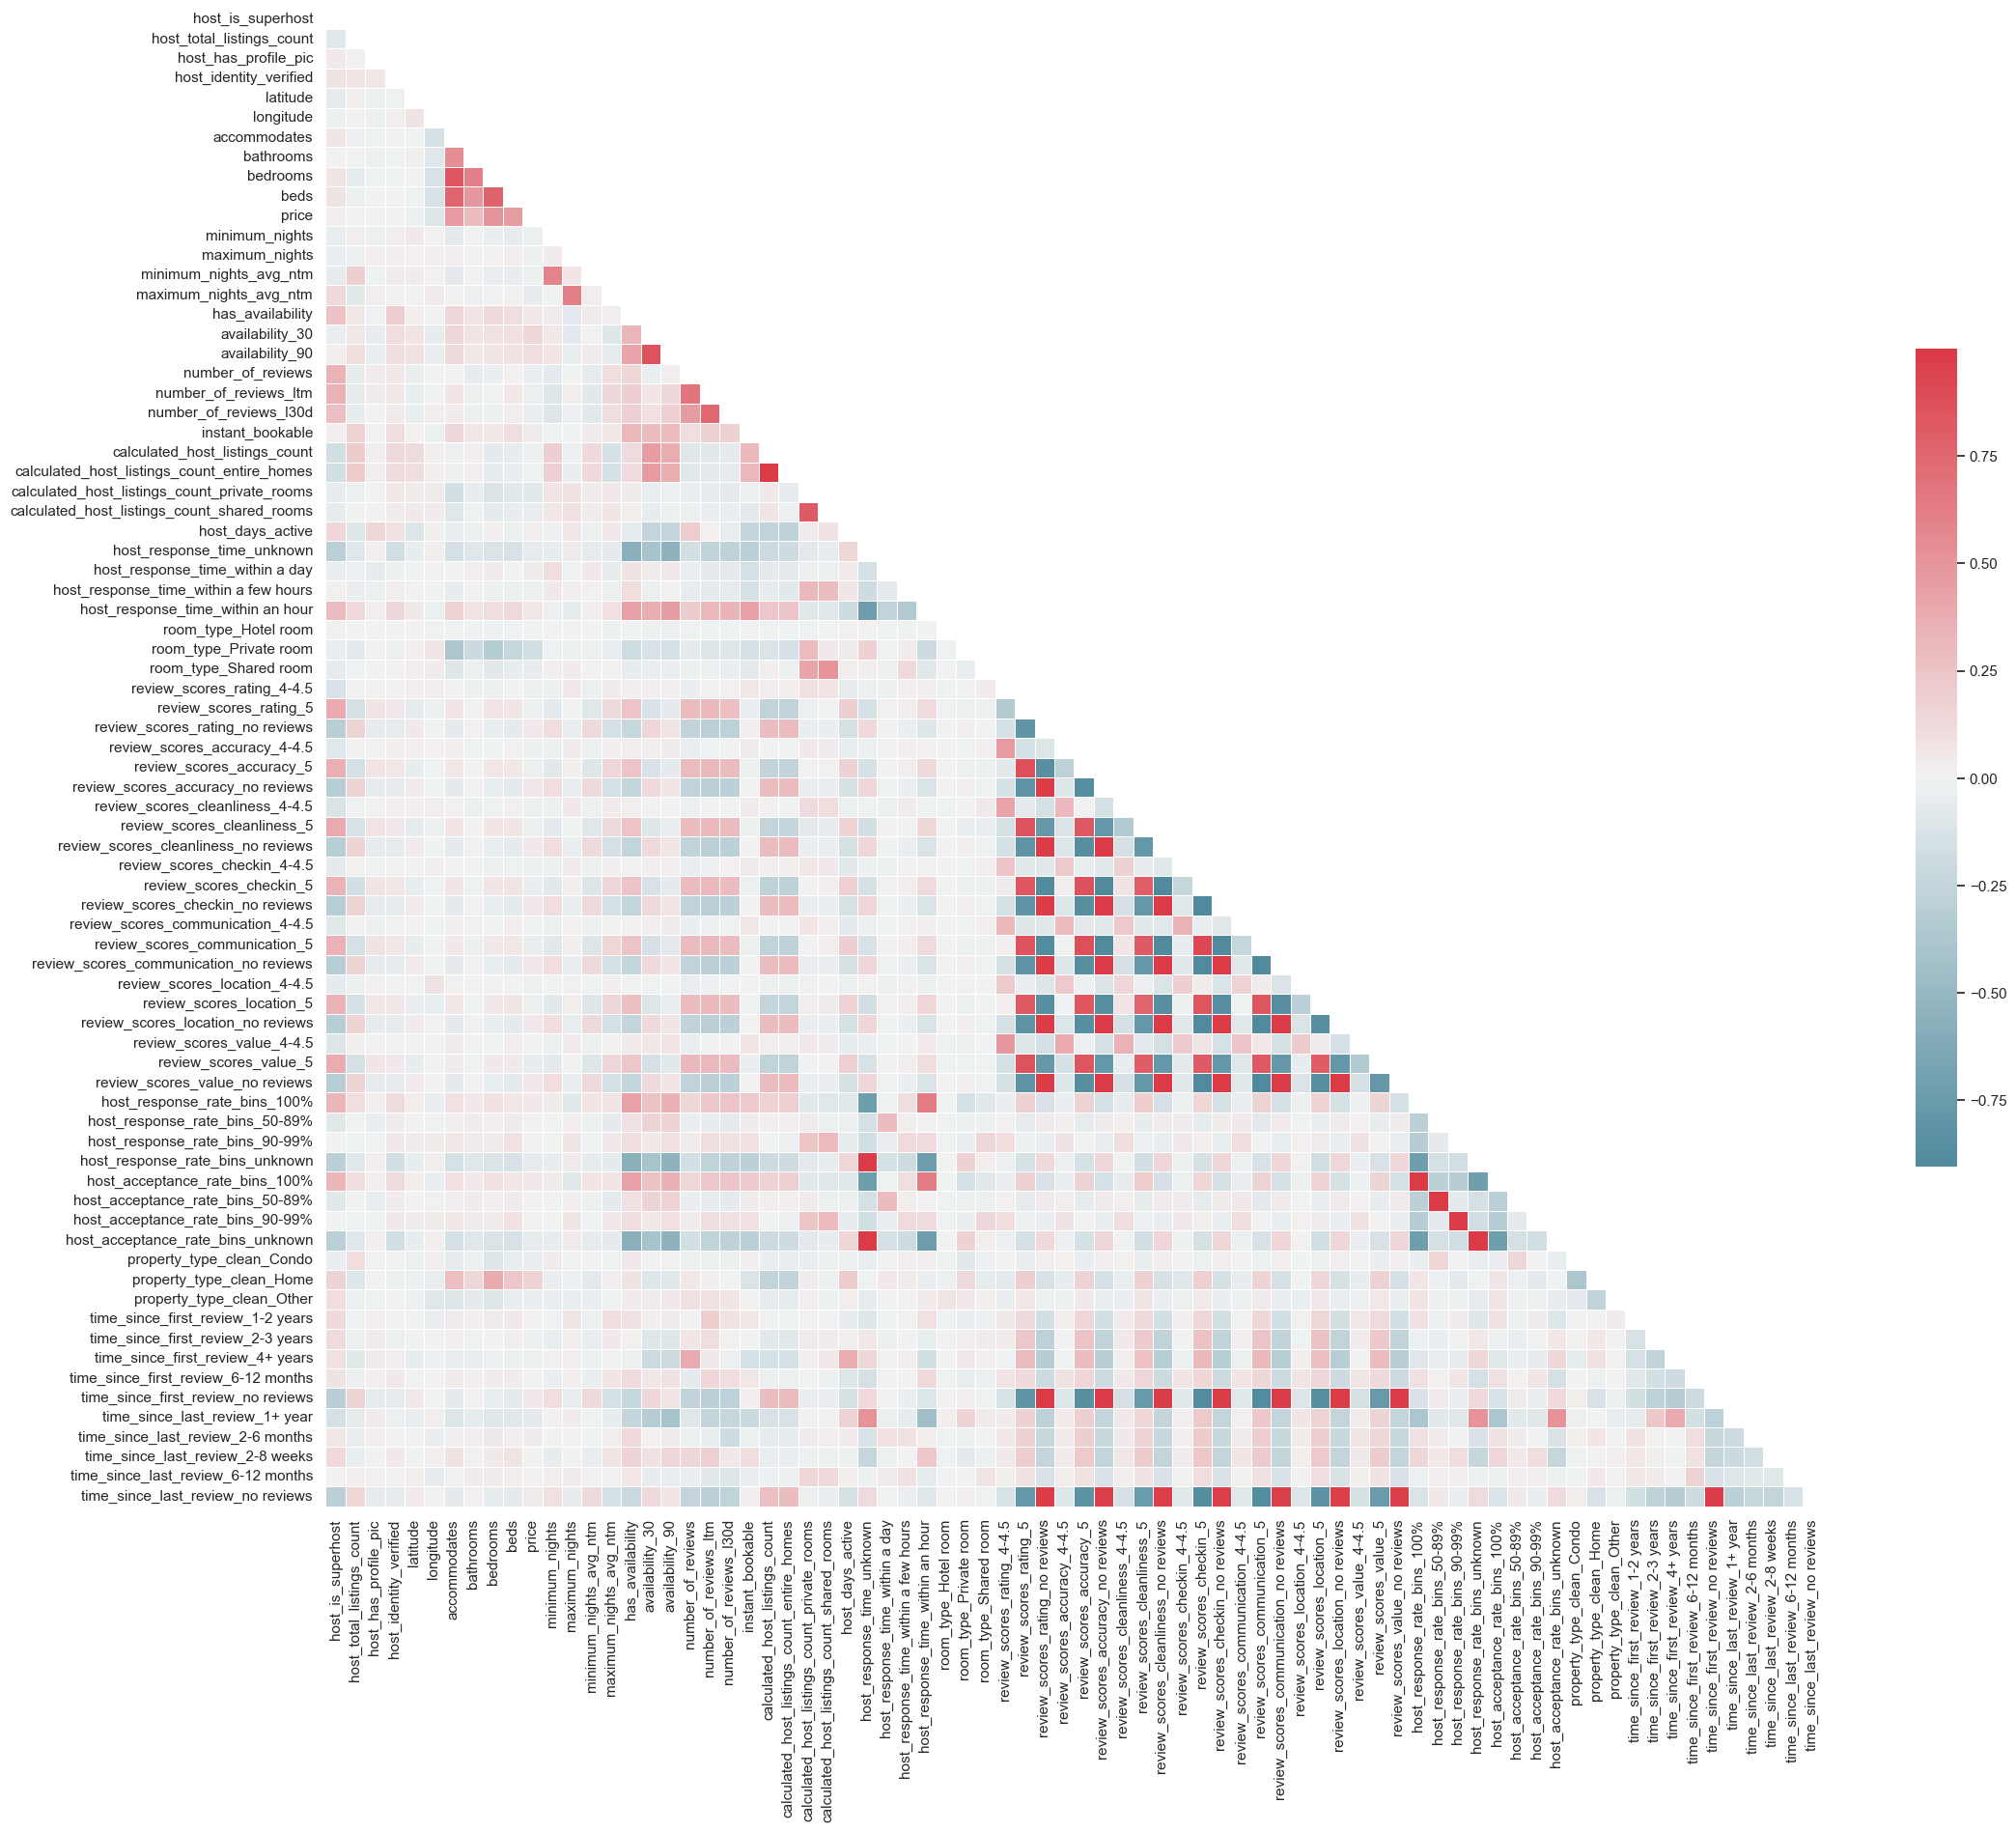

In [32]:
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood_cleansed')]), axis=1), figsize=(25,22))

Areas of multi-collinearity:

- `beds`, `bedrooms`,`bathrooms` and the number of people that a property `accommodates` are highly correlated. 
- there is perf correlation between `nan` unknown review labels for different review categories
- Same result for `host_response_rate_bins_unknown` and `host_response_time_bins_unknown`. One of these rates will be dropped.


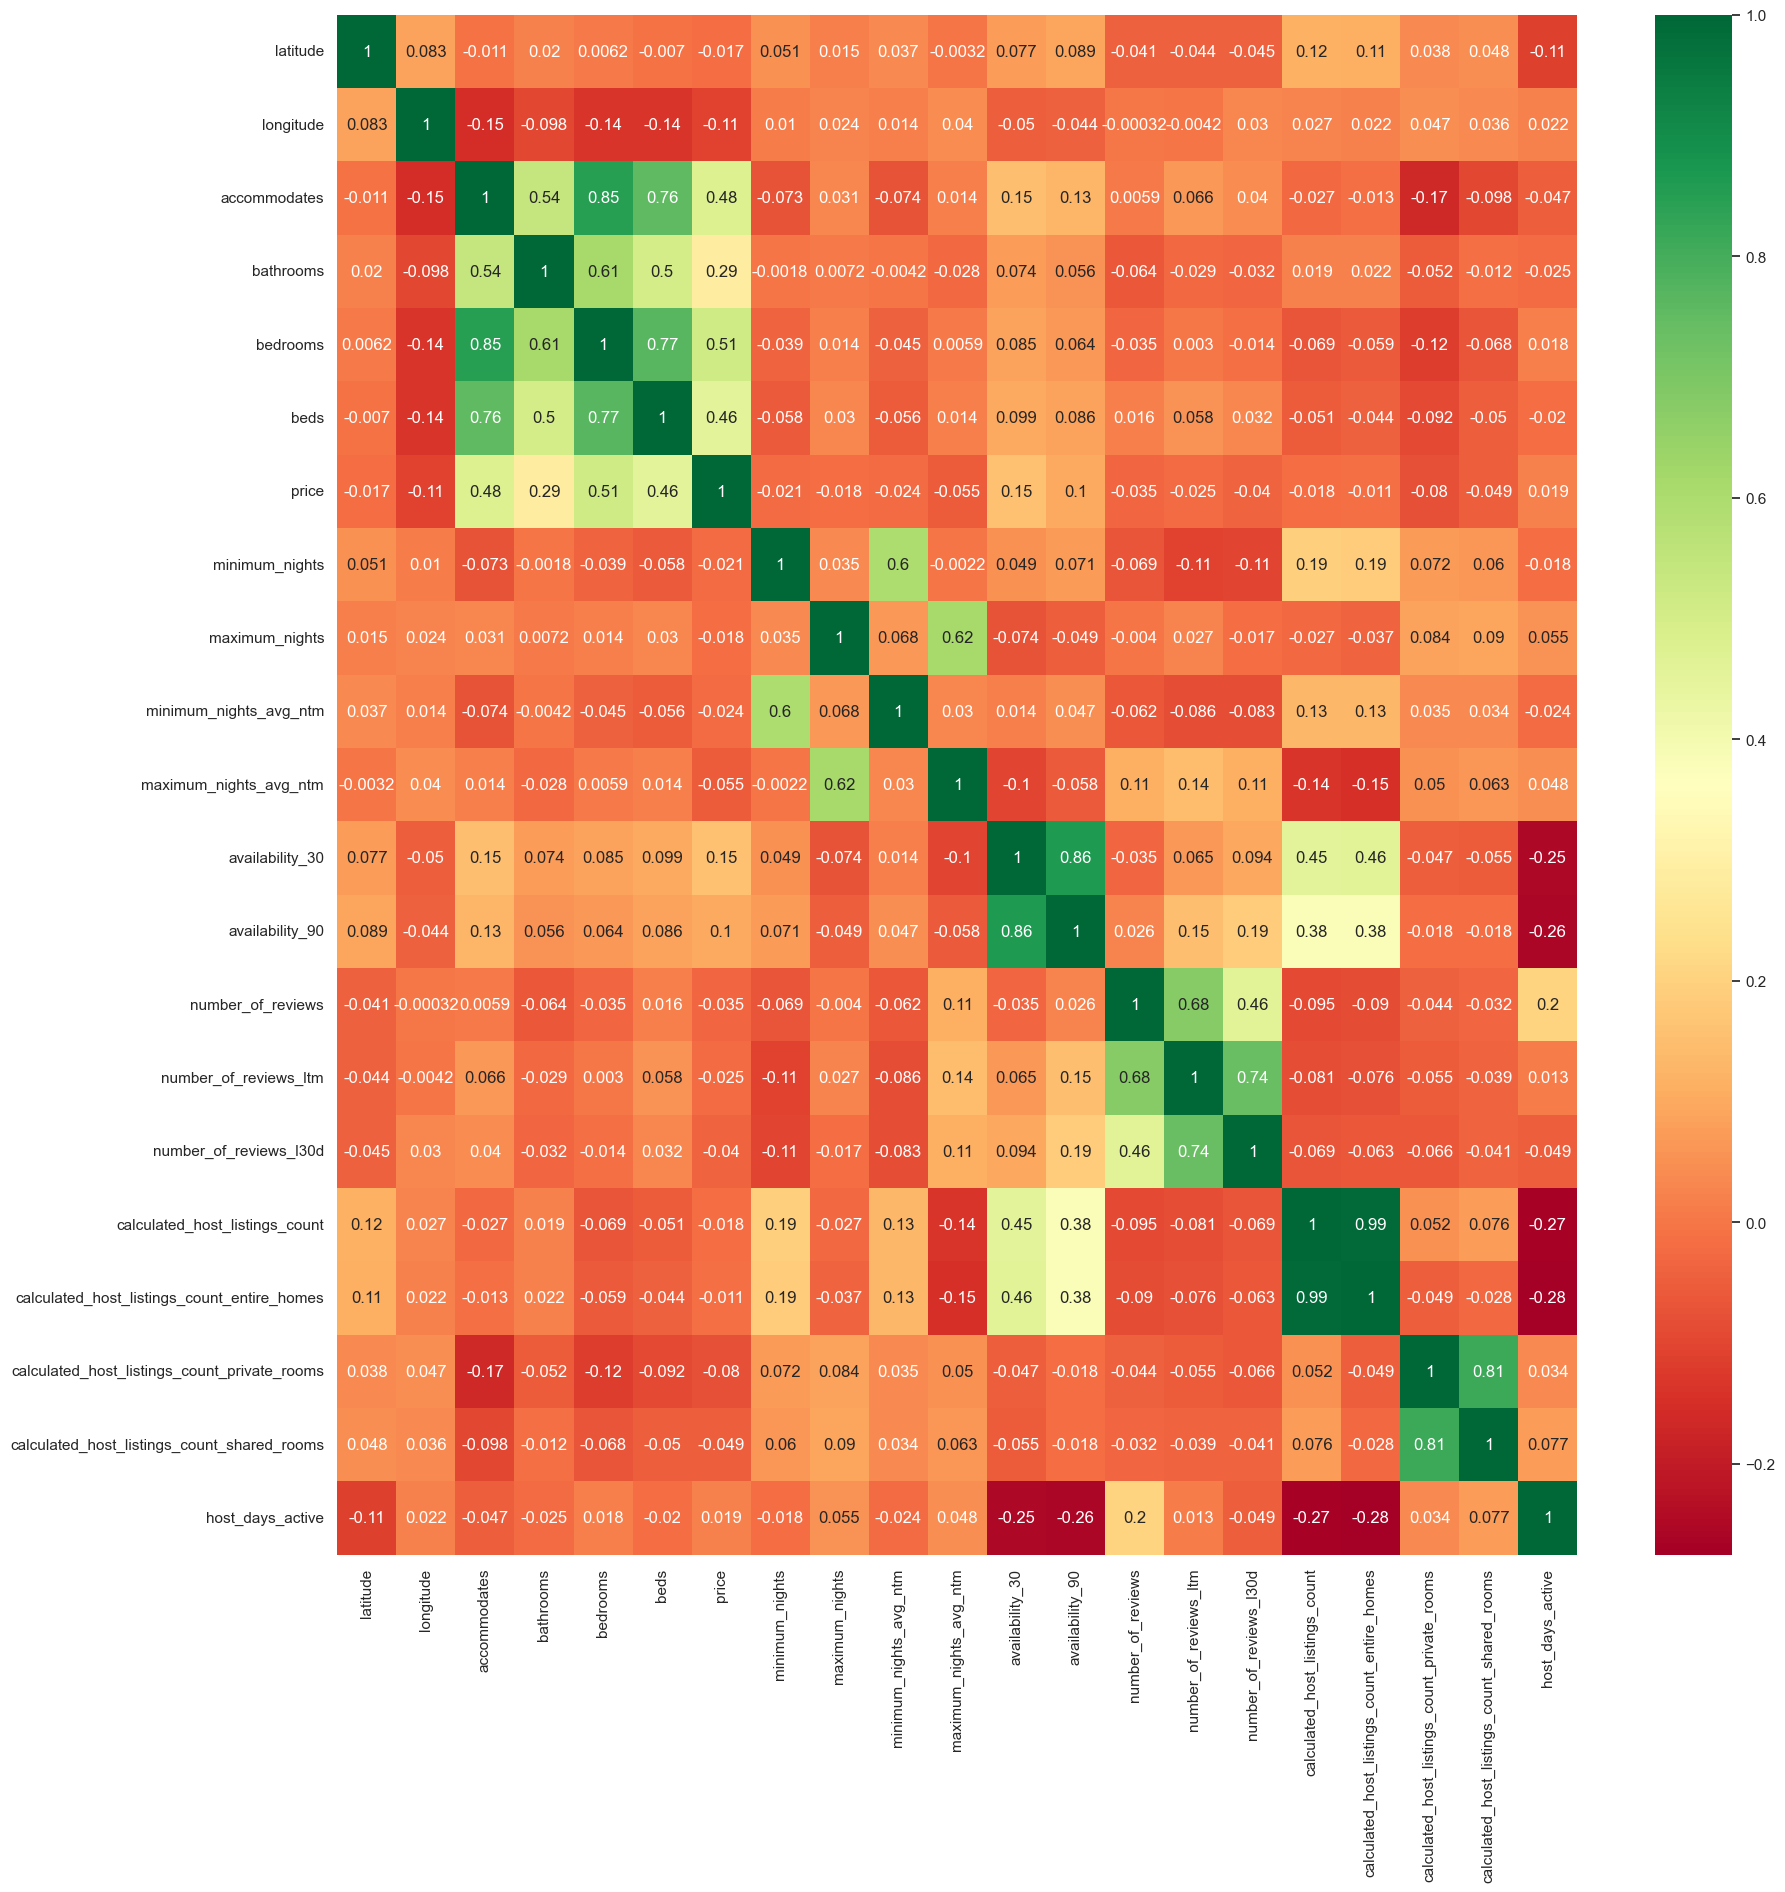

In [33]:
# Numerical only heatmap
# Correlation heatmap
correlation = transformed_df[numerical_columns].corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

In [34]:
to_drop = ['beds',
           'host_response_rate_bins_unknown',
           'host_response_time_unknown',
           'review_scores_accuracy_no reviews',
           'review_scores_cleanliness_no reviews',
           'review_scores_communication_no reviews',
           'review_scores_location_no reviews',
           'review_scores_value_no reviews']

transformed_df.drop(to_drop, axis=1, inplace=True)

### Standardize and Normalize

array([[<AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>],
       [<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>],
       [<AxesSubplot: title={'center': 'minimum_nights_avg_ntm'}>,
        <AxesSubplot: title={'center': 'maximum_nights_avg_ntm'}>,
        <AxesSubplot: title={'center': 'availability_30'}>,
        <AxesSubplot: title={'center': 'availability_90'}>],
       [<AxesSubplot: title={'center': 'number_of_reviews'}>,
        <AxesSubplot: title={'center': 'number_of_reviews_ltm'}>,
        <AxesSubplot: title={'center': 'number_of_reviews_l30d'}>,
        <AxesSubplot: title={'center': 'calculated_host_listings_count'}>],
       [<AxesSubplot: title={'cen

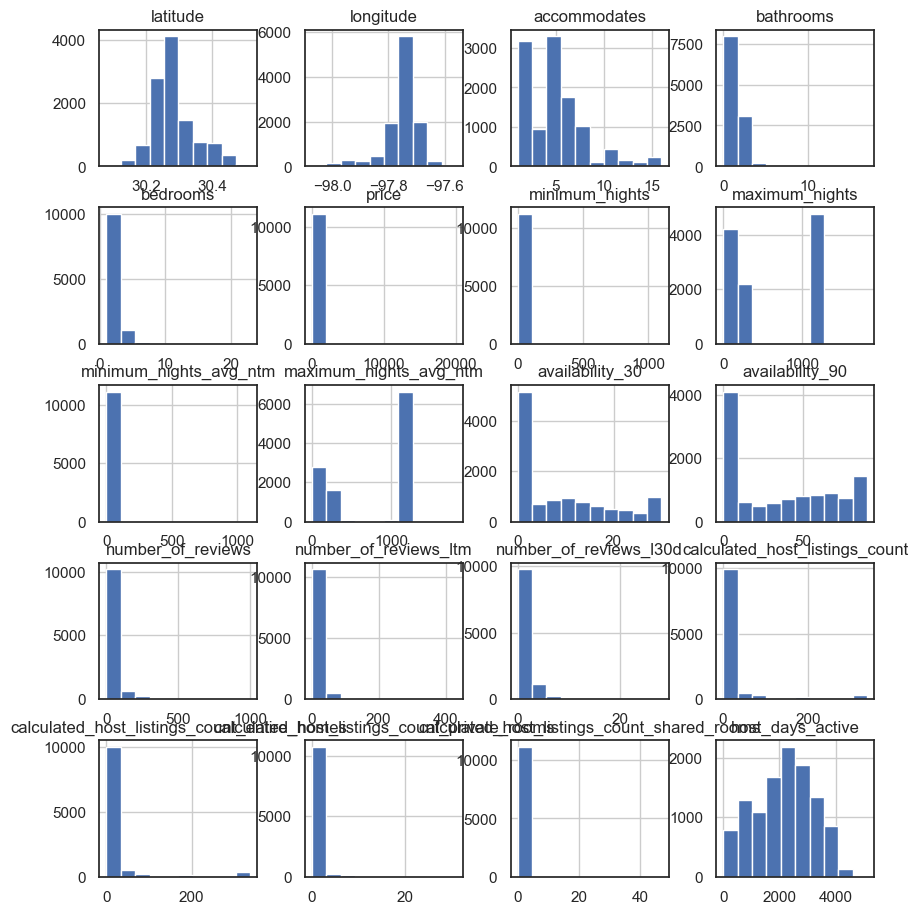

In [35]:
numerical_columns = ['latitude','longitude','accommodates','bathrooms',
                    'bedrooms','price','minimum_nights','maximum_nights',
                    'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                    'availability_30','availability_90','number_of_reviews',
                    'number_of_reviews_ltm','number_of_reviews_l30d',
                    'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                    'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                    'host_days_active']

# View numerical columns
transformed_df[numerical_columns].hist(figsize=(10,11))

Other than `availability_30`, `availability_90` and `host_days_active`, the remaining numerical features are all postively skewed and could benefit from log transformation.

In [36]:
# Log transforming columns
log_numerical_columns = [i for i in numerical_columns 
                     if i not in ['latitude','longitude','availability_30','availability_90', 'host_days_active']] # Removing items not to be transformed

for col in log_numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

array([[<AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>],
       [<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>],
       [<AxesSubplot: title={'center': 'minimum_nights_avg_ntm'}>,
        <AxesSubplot: title={'center': 'maximum_nights_avg_ntm'}>,
        <AxesSubplot: title={'center': 'availability_30'}>,
        <AxesSubplot: title={'center': 'availability_90'}>],
       [<AxesSubplot: title={'center': 'number_of_reviews'}>,
        <AxesSubplot: title={'center': 'number_of_reviews_ltm'}>,
        <AxesSubplot: title={'center': 'number_of_reviews_l30d'}>,
        <AxesSubplot: title={'center': 'calculated_host_listings_count'}>],
       [<AxesSubplot: title={'cen

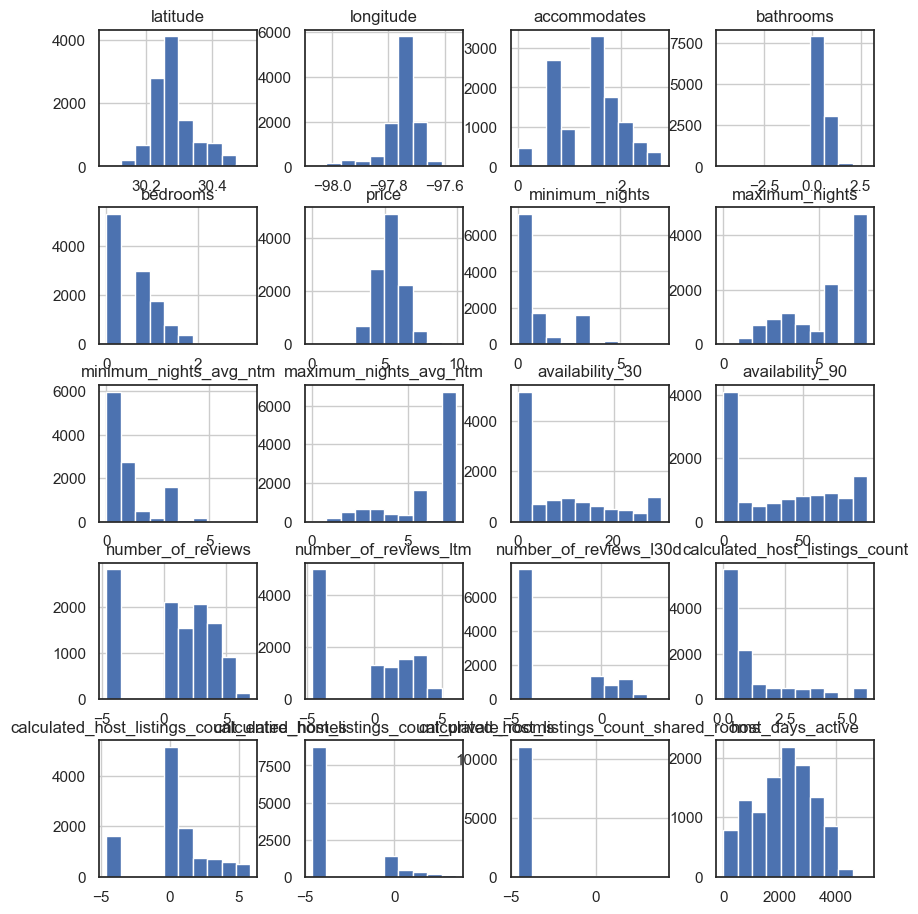

In [37]:
transformed_df[numerical_columns].hist(figsize=(10,11))

### Separate X, y and apply std scaler

In [38]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price
X_unscaled = X.copy()
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [45]:
# Splitting into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

X_train_unsc, X_test_unsc, y_train_unsc, y_test_unsc = train_test_split(X_unscaled, y, test_size=0.2, random_state=42) 

Print the size of the train, val, and test sets

In [46]:
print(f"Train Set Size; {X_train.shape[0]}")
print(f"Validation Set Size; {X_val.shape[0]}")
print(f"Test Set Size; {X_test.shape[0]}")

Train Set Size; 7196
Validation Set Size; 1799
Test Set Size; 2249


Helper function for executing diff models/algorithms

In [47]:
model_meta_data = []

# Function to execute model and addd metadata
def execute_model(model, model_metadata, X_train, X_test, Y_train, Y_test, id, fit=True):
    if fit:
        model.fit(X_train,Y_train)

    Y_train_pred  = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Acquire train/test sensetivity scores
    mse_train = mean_squared_error(Y_train,Y_train_pred)
    mse_test = mean_squared_error(Y_test,Y_test_pred)

    # Precision score for train/test data
    rsq_train = r2_score(Y_train,Y_train_pred)
    rsq_test = r2_score(Y_test,Y_test_pred)

    # Apply 3-fold cross validation to understand model
    scores = cross_validate(model, X_train, Y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

    print(scores)

    # Store results in model metadata obj
    meta_data = {"model": model, 
                "id": id,
                "r2_train": rsq_train,
                "r2_test": rsq_test,
                "train_cross_val_r2": scores['train_r2'].mean(),
                "test_cross_val_r2": scores['test_r2'].mean(),
                "mse_train": mse_train,
                "mse_test": mse_test,
                "train_cross_val_mse": abs(scores['train_neg_mean_squared_error'].mean()),
                "test_cross_val_mse": abs(scores['test_neg_mean_squared_error'].mean()),
                }
    
    # print values
    for key, val in meta_data.items():
        print(key, val)
    

    model_metadata.append(meta_data)

    return Y_train_pred, Y_test_pred

In [48]:
def plot_pred_actual(actual, pred, model_name):
    fig, ax = plt.subplots(figsize=(5, 4))


    ax.scatter(actual, pred, alpha=.7, color='b') #alpha helps to show overlapping data
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)

    ax.set_xlabel('Actual Log Price')  
    ax.set_ylabel('Predicted Log Price')  
    ax.set_title(model_name)  
    plt.show()

{'fit_time': array([0.03470612, 0.02963877, 0.02372575, 0.024055  , 0.02615666]), 'score_time': array([0.00228   , 0.00284123, 0.00221515, 0.00302315, 0.00328326]), 'test_r2': array([ 6.15289562e-01,  6.59830656e-01,  6.37440678e-01, -8.48128177e+17,
        6.43851286e-01]), 'train_r2': array([0.65947219, 0.64899295, 0.65509669, 0.65378319, 0.65351594]), 'test_neg_mean_squared_error': array([-3.26078127e-01, -3.01931097e-01, -3.25025444e-01, -7.34692347e+17,
       -3.22903697e-01]), 'train_neg_mean_squared_error': array([-0.30291039, -0.30869797, -0.30256668, -0.30636501, -0.3030382 ])}
model LinearRegression()
id lin-reg
r2_train 0.6528449975824646
r2_test 0.6526637677132738
train_cross_val_r2 0.6541721923344038
test_cross_val_r2 -1.6962563530026784e+17
mse_train 0.30590106610221773
mse_test 0.283105029423023
train_cross_val_mse 0.3047156503177544
test_cross_val_mse 1.469384694926928e+17


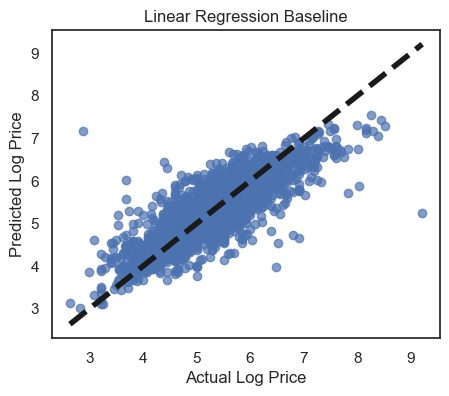

In [49]:

# Fit and analyze linear regression model
lin_reg = LinearRegression()  

# Run model with helper function
y_train_pred, y_val_pred = execute_model(lin_reg, model_meta_data, X_train, X_val, y_train, y_val, 'lin-reg')

plot_pred_actual(y_val, y_val_pred,'Linear Regression Baseline')

{'fit_time': array([0.01369715, 0.0093019 , 0.00876188, 0.01257586, 0.008955  ]), 'score_time': array([0.00359702, 0.00341988, 0.00318909, 0.00340605, 0.00307393]), 'test_r2': array([0.61530937, 0.65982126, 0.63750307, 0.64032909, 0.64386157]), 'train_r2': array([0.65947097, 0.64899244, 0.65530845, 0.65378009, 0.65351499]), 'test_neg_mean_squared_error': array([-0.32606134, -0.30193943, -0.32496951, -0.31156548, -0.32289438]), 'train_neg_mean_squared_error': array([-0.30291147, -0.30869841, -0.30238091, -0.30636775, -0.30303903])}
model Ridge()
id lin-reg
r2_train 0.6528442450818595
r2_test 0.6526969790803899
train_cross_val_r2 0.6542133903723325
test_cross_val_r2 0.6393648722751464
mse_train 0.3059017291799086
mse_test 0.2830779596727621
train_cross_val_mse 0.3046795167473424
test_cross_val_mse 0.3174860281648188


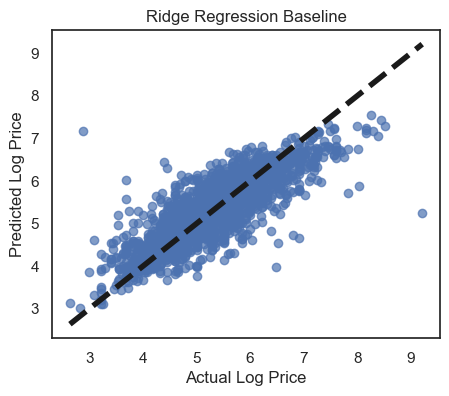

In [50]:
# Fit and analyze linear regression model
lin_reg = linear_model.Ridge()  

# Run model with helper function
y_train_pred, y_val_pred = execute_model(lin_reg, model_meta_data, X_train, X_val, y_train, y_val, 'ridge')

plot_pred_actual(y_val, y_val_pred, 'Ridge Regression Baseline')

{'fit_time': array([0.05018973, 0.0437572 , 0.04489017, 0.05006909, 0.040205  ]), 'score_time': array([0.00439119, 0.00725889, 0.00514102, 0.00534391, 0.00444603]), 'test_r2': array([0.58929266, 0.62972324, 0.61980604, 0.62092618, 0.61689729]), 'train_r2': array([0.63191506, 0.62161294, 0.6259009 , 0.62434909, 0.62456794]), 'test_neg_mean_squared_error': array([-0.34811294, -0.32865416, -0.34083446, -0.32837328, -0.34734165]), 'train_neg_mean_squared_error': array([-0.32742334, -0.33277769, -0.32817871, -0.33241106, -0.32835639])}
model Lasso(alpha=0.01)
id lasso
r2_train 0.6243854341826685
r2_test 0.6241938795425968
train_cross_val_r2 0.6256691874173372
test_cross_val_r2 0.6153290811091218
mse_train 0.3309786560092487
mse_test 0.33794184359215923
train_cross_val_mse 0.32982943723445757
test_cross_val_mse 0.33866329750274604


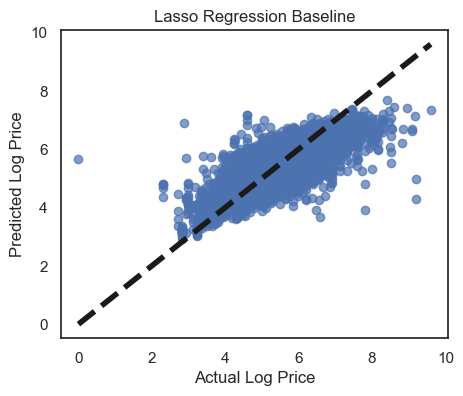

In [144]:
# Fit and analyze linear regression model
lin_reg = linear_model.Lasso(alpha=0.01)  

# Run model with helper function
y_train_pred, y_test_pred = execute_model(lin_reg, model_meta_data, X_train, X_test, y_train, y_test, 'lasso')

plot_pred_actual(y_train, y_train_pred, 'Lasso Regression Baseline')

In [145]:
lin_reg.coef_

array([ 0.03008827,  0.0454895 ,  0.00662739, -0.008385  , -0.04887399,
       -0.        ,  0.20365185,  0.00424956,  0.28784946, -0.11321866,
       -0.        , -0.02019591,  0.        , -0.00998859,  0.1424157 ,
       -0.        , -0.08522092,  0.        , -0.        , -0.01842757,
        0.        ,  0.01688306, -0.05878943, -0.03060217,  0.04822711,
        0.        , -0.        ,  0.        ,  0.0296603 ,  0.04323798,
        0.03555657, -0.0165247 ,  0.00978594, -0.01427036, -0.00487741,
       -0.03012967, -0.0070509 , -0.03075636, -0.03556589, -0.024604  ,
        0.        , -0.03594113, -0.02052362, -0.01474623,  0.00991143,
       -0.        ,  0.        ,  0.00146248, -0.        , -0.00750729,
       -0.01442751, -0.01483834, -0.00045387, -0.        , -0.04971865,
       -0.        , -0.06018374, -0.07336793,  0.02316247, -0.03560959,
       -0.05038469, -0.02360877, -0.00599791, -0.03202522, -0.02972447,
       -0.02529159, -0.04309076, -0.01240264, -0.02996989, -0.02

### Non-linear Models

#### Random Forest Regression

{'fit_time': array([2.80339193, 2.8535831 , 2.73972702, 2.74463487, 3.18332291]), 'score_time': array([0.01795721, 0.01804709, 0.01791692, 0.01885915, 0.02431917]), 'test_r2': array([0.62753531, 0.64194699, 0.66106401, 0.62984424, 0.66132101]), 'train_r2': array([0.76666253, 0.76378029, 0.75781739, 0.76246525, 0.76096463]), 'test_neg_mean_squared_error': array([-0.31569871, -0.31780447, -0.30384772, -0.320648  , -0.3070647 ]), 'train_neg_mean_squared_error': array([-0.20756116, -0.20774666, -0.21245487, -0.21019296, -0.20906258])}
model RandomForestRegressor(max_depth=8)
id random-forest
r2_train 0.7507313730907778
r2_test 0.6768216025602406
train_cross_val_r2 0.7623380156546352
test_cross_val_r2 0.6443423104064766
mse_train 0.21964695362694697
mse_test 0.2634145856702351
train_cross_val_mse 0.20940364645893933
test_cross_val_mse 0.313012719747426


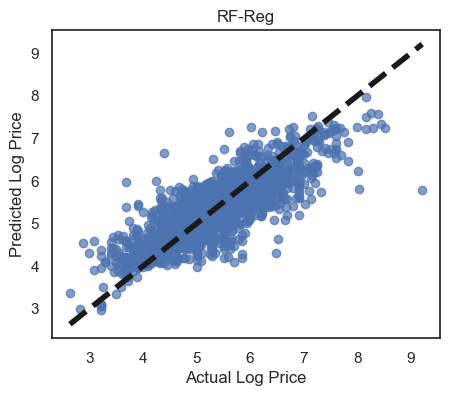

In [70]:
# Create base random forest regressor
rf_reg  = RandomForestRegressor(max_depth = 8)

y_train_pred, y_val_pred = execute_model(rf_reg, model_meta_data, X_train, X_val, y_train, y_val, 'random-forest')

plot_pred_actual(y_val, y_val_pred, 'RF-Reg')

In [75]:
# RF model
estimator = RandomForestRegressor()

# Hyperparameter tuning
parameters = {
    'max_depth': list(range(6, 10, 1)) + [None],
    'n_estimators': range(100, 220, 40),
}

# Apply grid search
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'r2',
    n_jobs = 10,
    cv = 5,
    verbose=3,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 2/5] END max_depth=6, n_estimators=100;, score=(train=0.671, test=0.605) total time=   6.3s
[CV 3/5] END max_depth=6, n_estimators=100;, score=(train=0.667, test=0.622) total time=   6.3s
[CV 5/5] END max_depth=6, n_estimators=100;, score=(train=0.671, test=0.626) total time=   6.3s
[CV 1/5] END max_depth=6, n_estimators=100;, score=(train=0.676, test=0.593) total time=   6.3s
[CV 4/5] END max_depth=6, n_estimators=100;, score=(train=0.670, test=0.600) total time=   6.4s
[CV 3/5] END max_depth=6, n_estimators=140;, score=(train=0.669, test=0.622) total time=   8.5s
[CV 1/5] END max_depth=6, n_estimators=140;, score=(train=0.675, test=0.589) total time=   8.6s
[CV 2/5] END max_depth=6, n_estimators=140;, score=(train=0.670, test=0.603) total time=   8.5s
[CV 4/5] END max_depth=6, n_estimators=140;, score=(train=0.670, test=0.599) total time=   8.5s
[CV 5/5] END max_depth=6, n_estimators=140;, score=(train=0.672, test=0.625

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=10,
             param_grid={'max_depth': [6, 7, 8, 9, None],
                         'n_estimators': range(100, 220, 40)},
             return_train_score=True, scoring='r2', verbose=3)

In [76]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14      28.501722      0.064819         0.293465        0.058734   
13      33.030461      0.128232         0.273003        0.068335   
12      24.413431      0.200657         0.560941        0.180717   
10      12.465322      0.038757         0.073639        0.003662   
11      18.374762      0.142532         0.229209        0.051532   
9        8.829485      0.017864         0.053573        0.005091   
7       11.753143      0.046188         0.066393        0.005036   
6       10.006495      0.040782         0.078172        0.013541   
8       14.378109      0.053181         0.077996        0.005764   
3        6.668345      0.025819         0.039850        0.003095   
5       15.454936      0.037640         0.077699        0.008997   
4       11.341809      0.043116         0.101752        0.008052   
2       10.447557      0.111967         0.119873        0.050115   
0        6.272234      0.031663         0.046606        0.003933   
1        8.481491      0.047273         0.049225        0.001782   

   param_max_depth param_n_estimators  \
14            None                180   
13            None                140   
12            None                100   
10               9                140   
11               9                180   
9                9                100   
7                8                140   
6                8                100   
8                8                180   
3                7                100   
5                7                180   
4                7                140   
2                6                180   
0                6                100   
1                6                140   

                                      params  split0_test_score  \
14  {'max_depth': None, 'n_estimators': 180}           0.660327   
13  {'max_depth': None, 'n_estimators': 140}           0.661448   
12  {'max_depth': None, 'n_estimators': 100}           0.659016   
10     {'max_depth': 9, 'n_estimators': 140}           0.638361   
11     {'max_depth': 9, 'n_estimators': 180}           0.636628   
9      {'max_depth': 9, 'n_estimators': 100}           0.634704   
7      {'max_depth': 8, 'n_estimators': 140}           0.625991   
6      {'max_depth': 8, 'n_estimators': 100}           0.623650   
8      {'max_depth': 8, 'n_estimators': 180}           0.625406   
3      {'max_depth': 7, 'n_estimators': 100}           0.613523   
5      {'max_depth': 7, 'n_estimators': 180}           0.609638   
4      {'max_depth': 7, 'n_estimators': 140}           0.609977   
2      {'max_depth': 6, 'n_estimators': 180}           0.589887   
0      {'max_depth': 6, 'n_estimators': 100}           0.592861   
1      {'max_depth': 6, 'n_estimators': 140}           0.588701   

    split1_test_score  split2_test_score  split3_test_score  \
14           0.687776           0.699720           0.670532   
13           0.687207           0.700226           0.676282   
12           0.683231           0.698550           0.670661   
10           0.658157           0.673669           0.642694   
11           0.657533           0.673796           0.644660   
9            0.654834           0.673438           0.641179   
7            0.645096           0.659938           0.632477   
6            0.644156           0.660318           0.634726   
8            0.645897           0.662732           0.625154   
3            0.627724           0.645424           0.616009   
5            0.627706           0.646352           0.615534   
4            0.627248           0.643511           0.614522   
2            0.607864           0.622161           0.598854   
0            0.605001           0.622206           0.599568   
1            0.602561           0.622335           0.599374   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
14           0.695431         0.682757        0.015008                1   
13           0.688469     

#### Xgboost

{'fit_time': array([1.43556809, 0.67974019, 0.41817904, 0.73356104, 0.73764706]), 'score_time': array([0.01223183, 0.00685596, 0.00868201, 0.01093507, 0.00821924]), 'test_r2': array([0.66786635, 0.6904825 , 0.68309624, 0.69297352, 0.6942829 ]), 'train_r2': array([0.7536137 , 0.74909305, 0.74773708, 0.75089671, 0.7445037 ]), 'test_neg_mean_squared_error': array([-0.28151438, -0.27472481, -0.28409637, -0.26596217, -0.27717967]), 'train_neg_mean_squared_error': array([-0.21916851, -0.22066356, -0.22129783, -0.22042988, -0.22345946])}
model XGBRegressor(alpha=30, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=

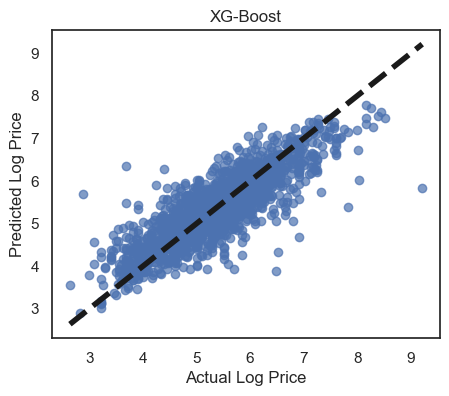

In [63]:
# xgboost regressor
xgb_reg = xgb.XGBRegressor(alpha=30,max_depth=6)

y_train_pred, y_val_pred = execute_model(xgb_reg, model_meta_data, X_train, X_val, y_train, y_val, 'xg-boost')

plot_pred_actual(y_val, y_val_pred, 'XG-Boost')

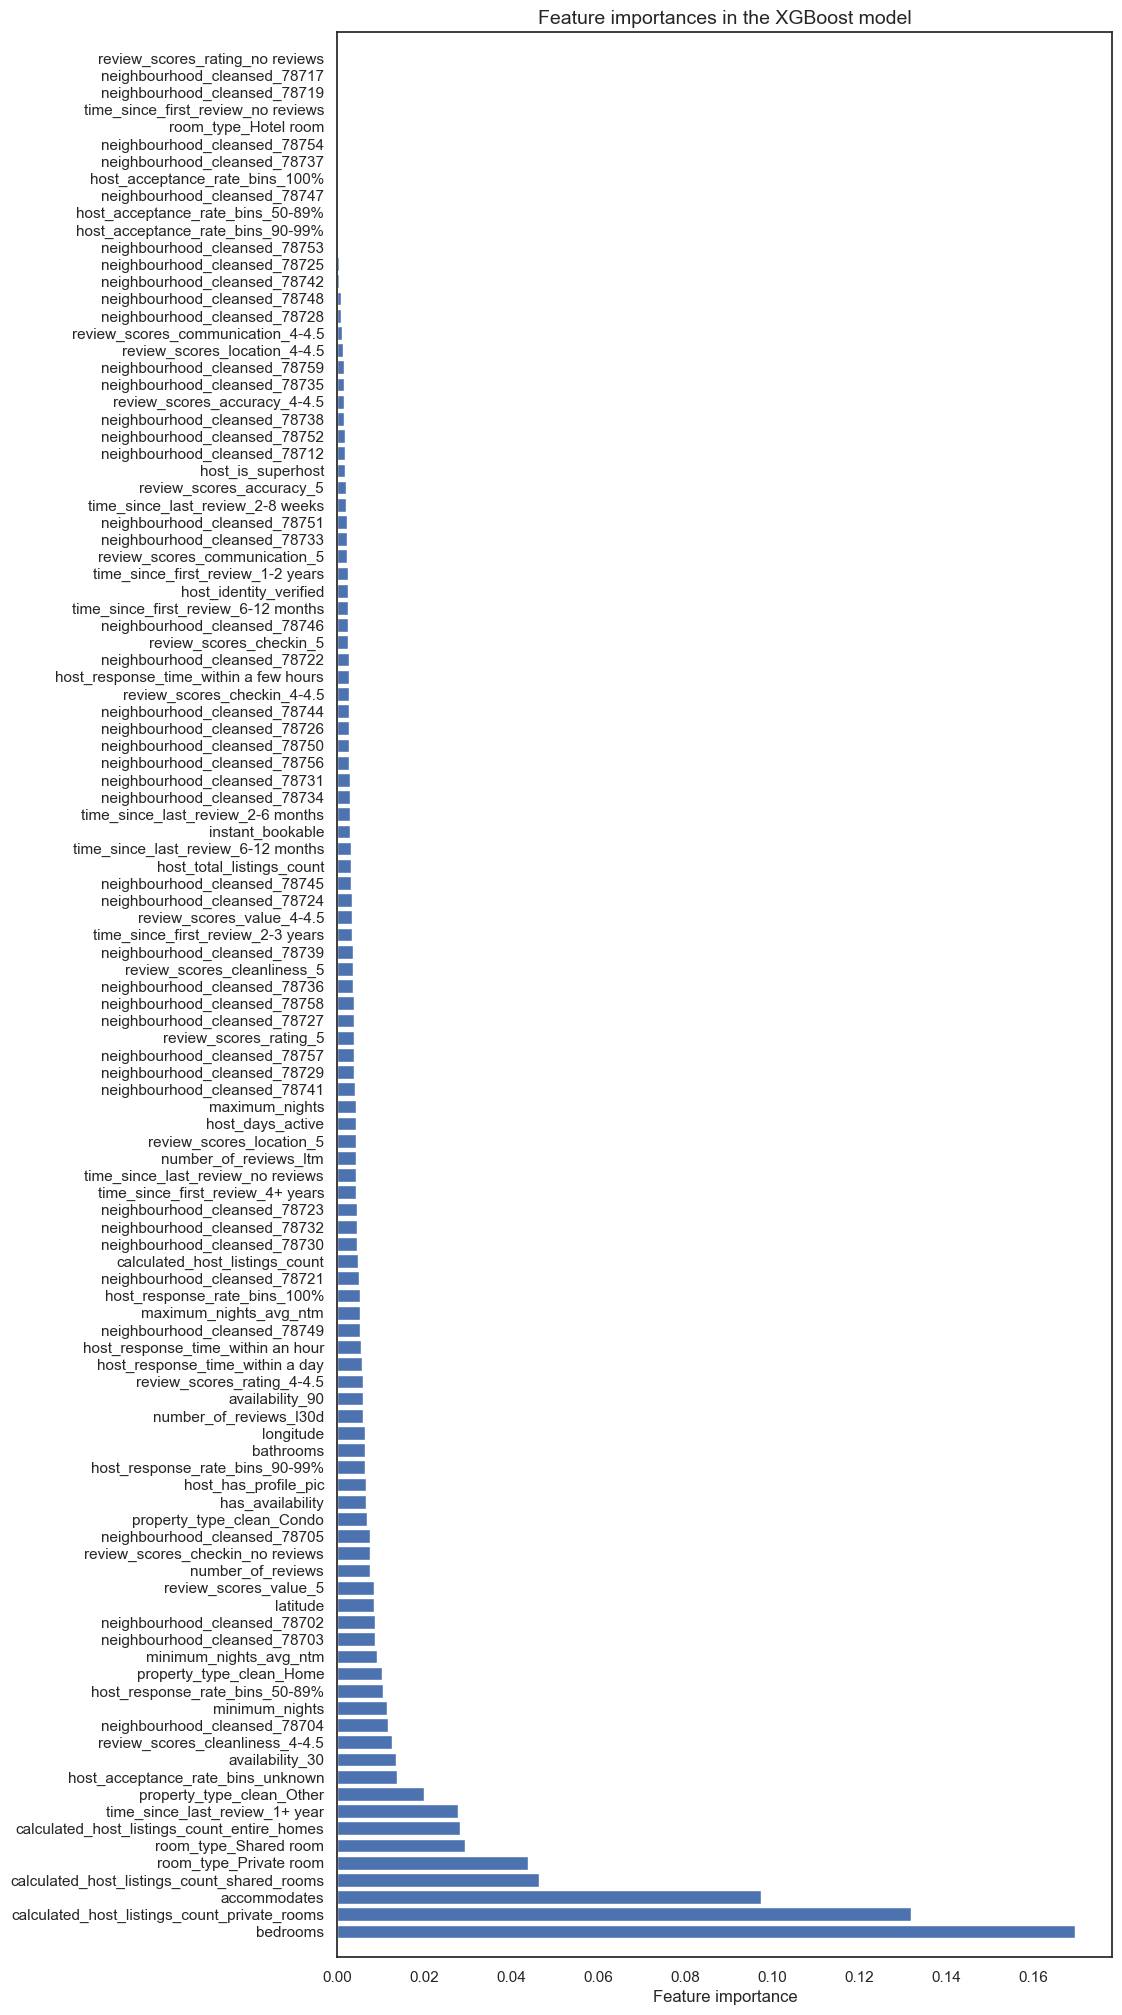

In [171]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)


# Plotting feature importances
plt.figure(figsize=(10,25))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [190]:
from sklearn.model_selection import GridSearchCV


# xgboost regressor
estimator = xgb.XGBRegressor(seed=42, nthread=4)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'alpha': [0, 0.1, 1, 10, 30, 100]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error',
    n_jobs = 10,
    cv = 5,
    verbose=3
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=-0.307 total time=   2.4s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=-0.348 total time=   2.5s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=-0.331 total time=   2.5s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-0.310 total time=   3.7s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-0.318 total time=   3.7s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=-0.281 total time=   3.8s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=-0.305 total time=   4.8s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=-0.270 total time=   4.9s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=-0.300 total time=   5.0s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=60;, score=-0.311 t

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='neg_mean_squared_error', verbose=3)

In [207]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('rank_test_score')['param_max_depth']

87    7
19    6
83    6
18    6
15    5
91    8
86    7
22    7
23    7
17    6
21    7
90    8
14    5
82    6
95    9
29    9
13    5
94    9
30    9
11    4
31    9
28    9
26    8
79    5
25    8
27    8
20    7
10    4
24    8
16    6
89    8
85    7
93    9
78    5
9     4
81    6
12    5
75    4
7     3
74    4
77    5
6     3
8     4
5     3
73    4
71    3
3     2
70    3
2     2
4     3
1     2
69    3
67    2
66    2
0     2
92    9
84    7
88    8
80    6
65    2
76    5
72    4
68    3
64    2
55    7
59    8
51    6
63    9
47    5
43    4
39    3
35    2
54    7
50    6
58    8
62    9
46    5
42    4
38    3
34    2
53    7
49    6
57    8
61    9
45    5
41    4
37    3
33    2
48    6
52    7
56    8
60    9
44    5
40    4
36    3
32    2
Name: param_max_depth, dtype: object

{'fit_time': array([2.56341505, 2.19070721, 1.91300583]), 'score_time': array([0.02184987, 0.015872  , 0.01537609]), 'test_r2': array([0.70415548, 0.69905366, 0.72999514]), 'train_r2': array([0.88774658, 0.88971535, 0.87760357]), 'test_neg_mean_squared_error': array([-0.26984768, -0.25981913, -0.23218852]), 'train_neg_mean_squared_error': array([-0.09673444, -0.09772878, -0.10865591])}
model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimat

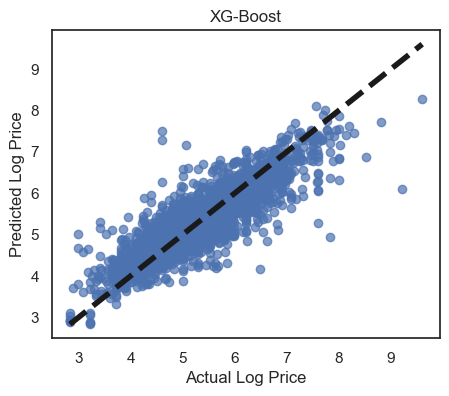

In [198]:
mod = grid_search.best_estimator_

y_train_pred, y_test_pred = execute_model(mod, model_meta_data, X_train, X_test, y_train, y_test, 'XG-boost_best', fit = False)

plot_pred_actual(y_test, y_test_pred, 'XG-Boost')